In [ ]:
## import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
X = np.load("/content/drive/MyDrive/images.npy")#read images
Y = pd.read_csv('/content/drive/MyDrive/counts.csv')#read cell counts 
F = np.loadtxt('/content/drive/MyDrive/split.txt')#read fold information

In [ ]:
Y

,neutrophil,epithelial,lymphocyte,plasma,eosinophil,connective
0,0,117,0,0,0,0
1,0,95,1,0,0,8
2,0,172,3,0,0,2
3,0,56,0,0,0,10
4,0,169,7,0,0,0
...,...,...,...,...,...,...
4976,0,22,17,8,2,50
4977,0,78,9,0,0,9
4978,0,106,1,0,0,0
4979,0,80,8,1,0,14


## Question No.1

### i.

In [ ]:
unique, counts = np.unique(F, return_counts=True)
print( "Number of examples in each fold:", dict(zip(unique, counts)))

Number of examples in each fold: {1.0: 1622, 2.0: 1751, 3.0: 1608}


### ii.

Find index of images that has largest count of each cell.

In [ ]:
count_idx = Y[list(Y.columns)].idxmax()

In [ ]:
count_idx

neutrophil    2915
epithelial    1965
lymphocyte     308
plasma        4897
eosinophil    2087
connective    4342
dtype: int64

-----image: 2915 -----


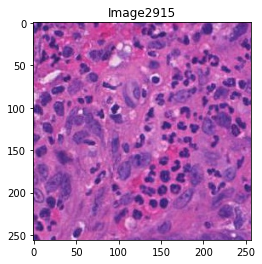

neutrophil    50
epithelial     0
lymphocyte    23
plasma         3
eosinophil     0
connective    53
Name: 2915, dtype: int64
-----image: 1965 -----


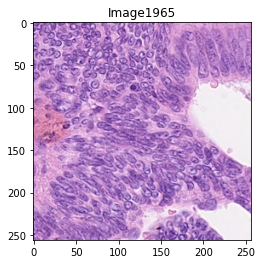

neutrophil      1
epithelial    253
lymphocyte      0
plasma          1
eosinophil      0
connective      1
Name: 1965, dtype: int64
-----image: 308 -----


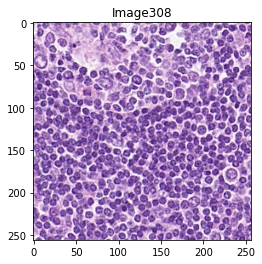

neutrophil      0
epithelial      0
lymphocyte    450
plasma          1
eosinophil      0
connective      4
Name: 308, dtype: int64
-----image: 4897 -----


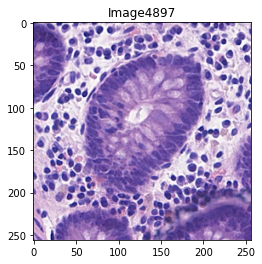

neutrophil      0
epithelial    105
lymphocyte     54
plasma         90
eosinophil      0
connective     14
Name: 4897, dtype: int64
-----image: 2087 -----


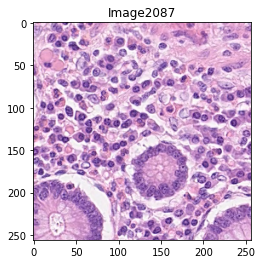

neutrophil     0
epithelial    36
lymphocyte    36
plasma        66
eosinophil    25
connective    39
Name: 2087, dtype: int64
-----image: 4342 -----


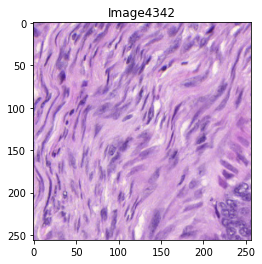

neutrophil      0
epithelial      7
lymphocyte      3
plasma          0
eosinophil      0
connective    104
Name: 4342, dtype: int64


In [ ]:


import matplotlib.pyplot as plt

for idx in count_idx :
  print("-----image: "+str(idx)+" -----")
  I = X[idx]/255.0
  plt.imshow(I);plt.title("Image"+str(idx));plt.show()
  print(Y.iloc[idx])



T1 cell: Irregular shape, most in round shape and oval.

T2 cell : Epithelial cells are in different shapes, like squamous, cuboidal, or columnar and they are closed to each other.

T3 cell : lymphocyte cells are in regular round shape and  in dark purple with a deep blue nucleus.

T4 cell :  plasma cells are round, containing abundant deep blue cytoplasm.

T5 cell :  There is a single nucleus, which is multilobed, and can have between 2 and 5 lobes.

T6 cell : connective cells are colourless strands of varying diameter running in all directions.

In [ ]:
X.shape

(4981, 256, 256, 3)

In [ ]:
fold1 = Y.iloc[np.where(F == 1)]
fold2 = Y.iloc[np.where(F == 2)]
fold3 = Y.iloc[np.where(F == 3)]


In [ ]:
np.sum(fold1.neutrophil == 0)

1308

### iii.

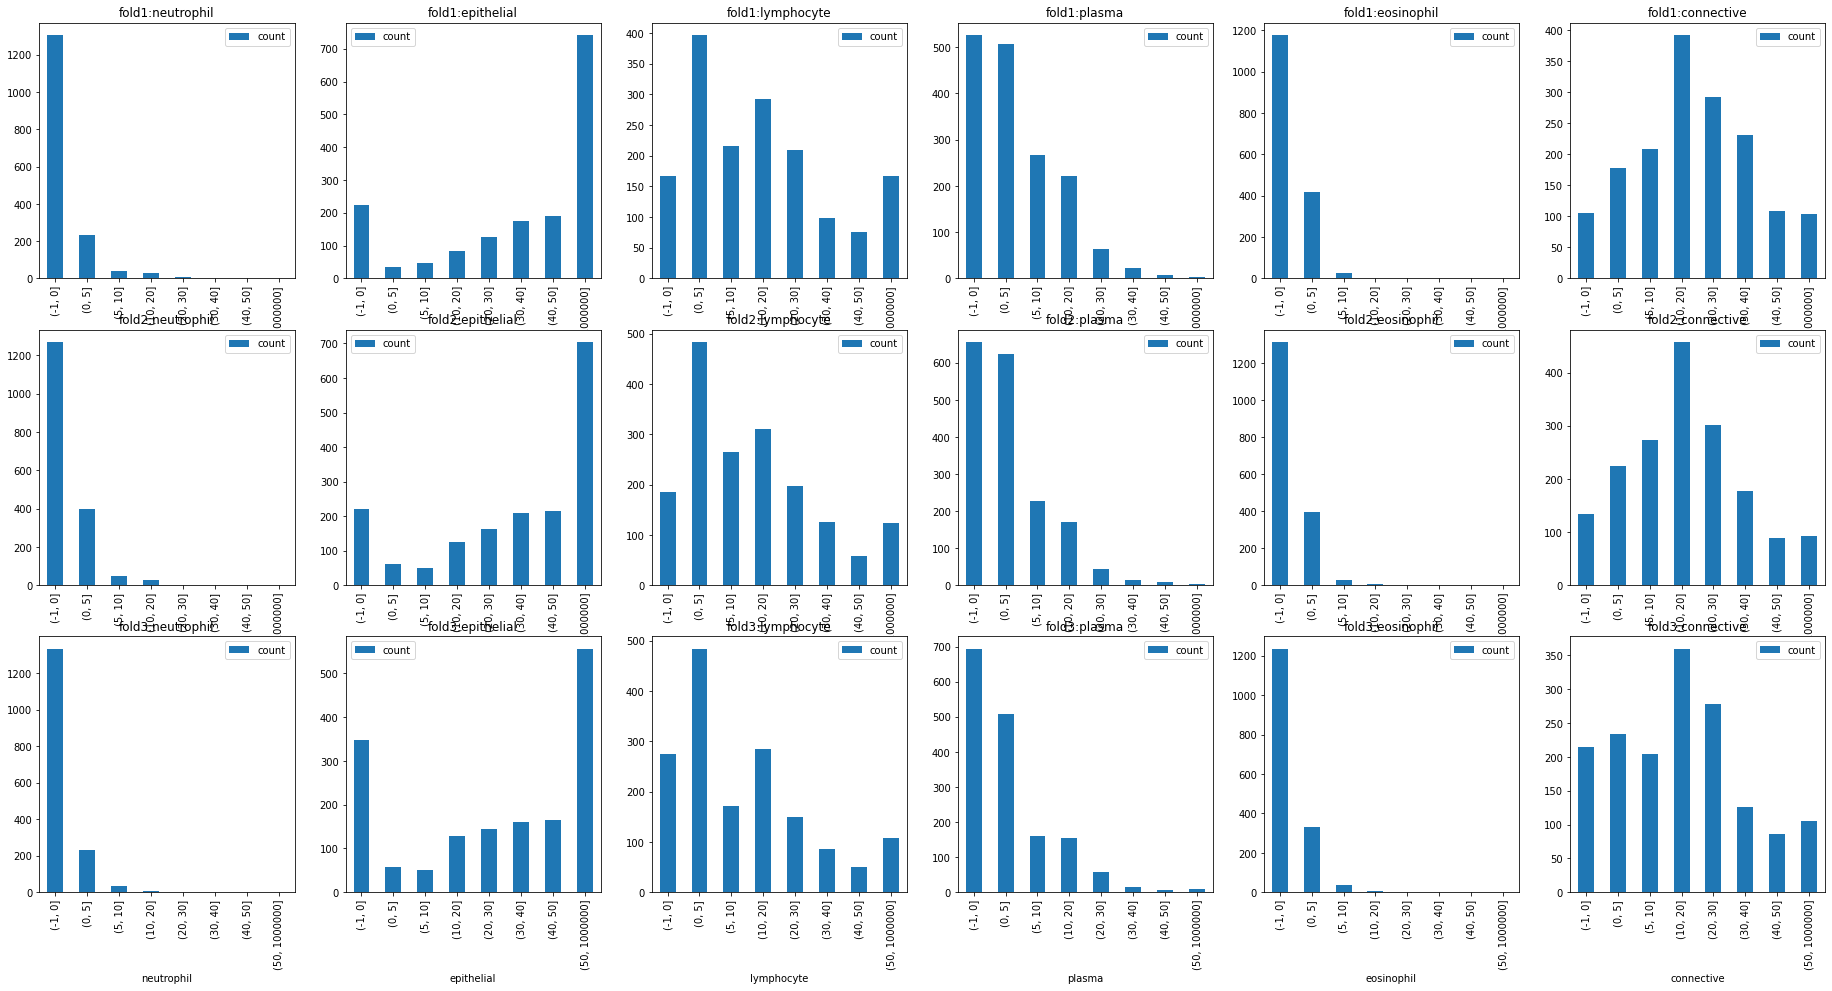

In [ ]:
#divide examples into bins and the last number indicates those cell counts greater than 50
bins = [-1, 0, 5, 10, 20, 30, 40, 50, 1000000]
p = 0

fig, axes = plt.subplots(nrows= 3, ncols =6)

for i,fold in enumerate([fold1, fold2, fold3]) :
  
  k = 0
  for column in fold:
   
    
    a = pd.cut(fold[column], bins)
    x = fold.groupby(a)[column].agg(['count'])
    
    c = x.plot(kind = 'bar', title = "fold"+str(i+1) + ":" + column, ax =axes[p,k] , figsize=(32,16))
    k+=1
  p+=1

### iv.

skimage version 0.18.3


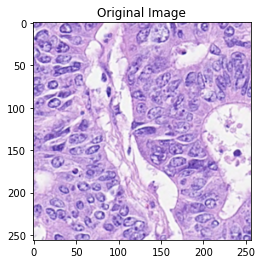

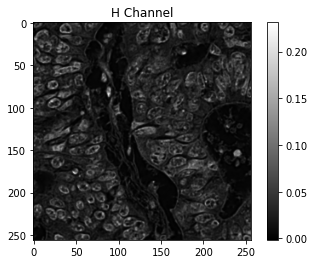

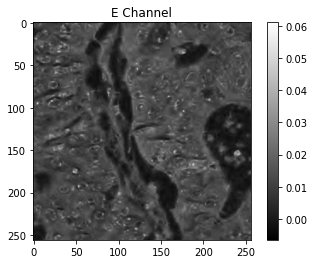

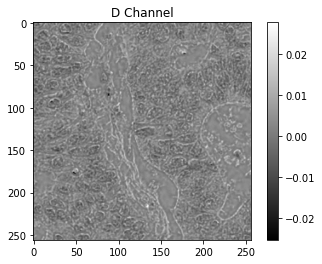

In [ ]:
from skimage.color import rgb2hed
import skimage
from skimage.io import imread
print('skimage version',skimage.__version__)
import matplotlib.pyplot as plt
I = X[0]/255.0 #read sample image and rescale pixel range in it
I_hed = rgb2hed(I) #convert to HED
plt.imshow(I);plt.title('Original Image');plt.show()
I_h = I_hed[:,:,0]; plt.figure(); plt.imshow(I_h,cmap='gray');plt.colorbar();plt.title('H Channel');plt.show()
I_e = I_hed[:,:,1]; plt.figure(); plt.imshow(I_e,cmap='gray');plt.colorbar();plt.title('E Channel');plt.show()
I_d = I_hed[:,:,2]; plt.figure(); plt.imshow(I_d,cmap='gray');plt.colorbar();plt.title('D Channel');plt.show()

In [ ]:
fold1_x = X[np.where(F == 1 )]

In [ ]:
fold1_x.shape

def avg_channel(x):
  res = []
  num = x.shape[0]
  for i in range(num):
    
    I = x[i,:,:,:]/255.0
    I_hed = rgb2hed(I)
    I_h = I_hed[:,:,0]
    
    res.append(I_h.mean())
  return res
res = avg_channel(fold1_x)

In [ ]:
np.array(res).shape

(1622,)

In [ ]:
fold1['avg_h_channel'] = res

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
fold1

,neutrophil,epithelial,lymphocyte,plasma,eosinophil,connective,avg_h_channel
136,0,54,4,7,0,12,0.014901
137,0,95,2,4,0,5,0.018371
138,0,101,14,13,3,25,0.022343
139,0,14,7,3,1,34,0.011796
140,0,0,0,0,0,2,0.005643
...,...,...,...,...,...,...,...
4840,1,83,23,16,0,13,0.023156
4841,0,53,29,28,4,31,0.022906
4842,0,6,17,7,2,56,0.011000
4843,0,53,28,23,3,33,0.022508


### v.

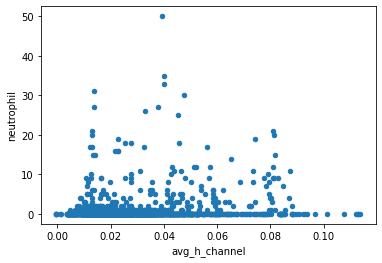

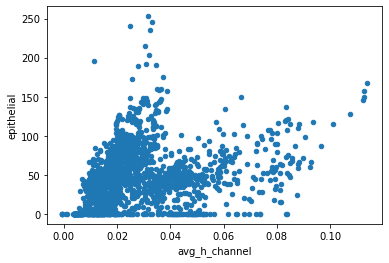

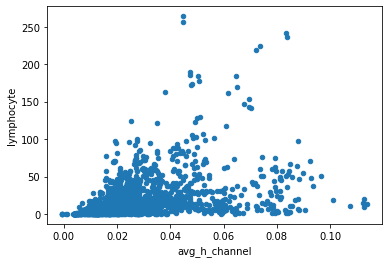

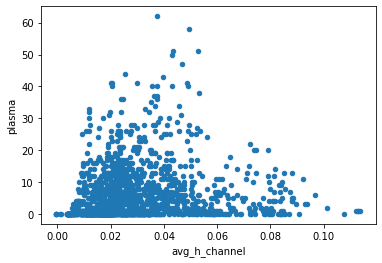

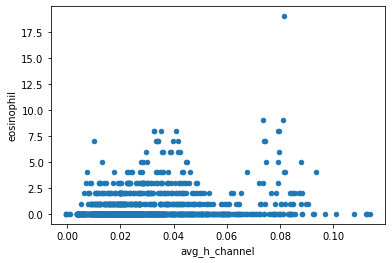

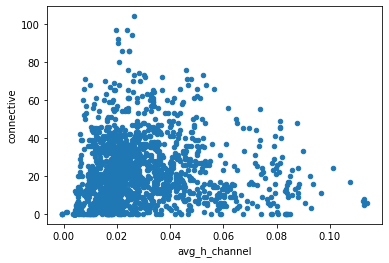

In [ ]:
for column in fold1:
  if column != 'avg_h_channel':
    fold1.plot(x ='avg_h_channel', kind = 'scatter', y = column)

For T2, T3, Y4 and T6 cells, it could be seen that there is a linear relation between average of the H-channel and the cell count, which could be directly fitted by linear model like Lineaer Regression. However, for T1 and T5 cells, there is no explicit linear relationship. So it is a good choice to take average of the H-channel as a feature directly for simple linear models.

### vi

For this regression model, **MSE, RMSE, MAE, RMSE and  R<sup>2</sup> score** could be used for this problem. And **R<sup>2</sup> score** is the best one and it gives the proportion of variance explained by the model across the vriance of data. Since the numbers of different cell types (especially T3) distributed in bins across 0 to more than 50, and **R<sup>2</sup> score** could reflect a relative value that how good the model is, compared to metrics like **MSE and RMSE**.
 

## Question No.2

### i

##### a,b,c

In [ ]:

class extract_feature:
  '''
  A class contains methods of computing
  the statistics in a given channel and
  I use for loop instead of matrix operation
  to avoid RAM crash.
  '''
  def __init__(self,X):
    self.X = X / 255.0
    self.num = X.shape[0]
    print("Input shape:",X.shape)
    
  
  def avg_feat(self):
    
    res = []
    res = []
    h_channel_res = []
    # get h-channel mean
    
    for i in range(self.num):
      I = X[i,:,:,:]
      I_hed = rgb2hed(I)
      I_h = I_hed[:,:,0]
      
      h_channel_res.append(np.mean(I_h))
    res.append(np.array(h_channel_res))
    # get rgb mean
    for i in range(3):
      temp = self.X[:,:,:,i]
      mean = np.mean(temp, axis = (1,2))
      res.append(mean)
    return res


  def var_feat(self):
    res = []
    h_channel_res = []
    
    # get h-channel var
    for i in range(self.num):
      I = X[i,:,:,:]
      I_hed = rgb2hed(I)
      I_h = I_hed[:,:,0]
      
      h_channel_res.append(np.var(I_h))
    res.append(np.array(h_channel_res))
    

    # get rgb var
    for i in range(3):
      temp = self.X[:,:,:,i]
      var = np.var(temp, axis = (1,2))
      res.append(var)
    return res

  def entropy_feat(self):
    from skimage.measure.entropy import shannon_entropy
    
    res = []
    h_channel_res = []
    
    # get h-channel var
    for i in range(self.num):
      I = X[i,:,:,:]
      I_hed = rgb2hed(I)
      I_h = I_hed[:,:,0]
      
      h_channel_res.append(shannon_entropy(I_h))
    res.append(np.array(h_channel_res))

    for i in range(3):
      entropy_list = []
      for j in range(self.num):
        temp = self.X[j,:,:,i]
        entropy = shannon_entropy(temp)
        entropy_list.append(entropy)
      res.append(np.array(entropy_list))
    return res


def feat_generator(X):
  a = extract_feature(X)
  res_avg = a.avg_feat()
  res_var = a.var_feat()
  res_entropy = a.entropy_feat()
  df_avg = pd.DataFrame(np.transpose(np.array(res_avg)), columns = ['avg_H', 'avg_red', 'avg_green', 'avg_blue'] )
  df_var = pd.DataFrame(np.transpose(np.array(res_var)), columns = ['var_H', 'var_red', 'var_green', 'var_blue'] )
  df_ent = pd.DataFrame(np.transpose(np.array(res_entropy)), columns = ['ent_H', 'ent_red', 'ent_green', 'ent_blue'] )

  feat_dataset  = pd.concat([df_avg, df_var, df_ent, Y.iloc[:,2]], axis = 1)

  return feat_dataset

#res = feat_generator(X)
#res.to_csv('/content/drive/MyDrive/feat_dataset.csv', index = False)



In [ ]:
feat_dataset = pd.read_csv('/content/drive/MyDrive/feat_dataset.csv')

In [ ]:
feat_dataset

,avg_H,avg_red,avg_green,avg_blue,var_H,var_red,var_green,var_blue,ent_H,ent_red,ent_green,ent_blue,lymphocyte
0,0.028605,0.775287,0.666784,0.864555,0.000512,0.020474,0.028851,0.007413,15.118937,7.063311,7.343395,6.344929,0
1,0.026076,0.794013,0.691662,0.873952,0.000533,0.021799,0.033510,0.007838,14.800732,6.976390,7.268564,6.295099,1
2,0.029113,0.773916,0.667299,0.862993,0.000586,0.023675,0.035489,0.008239,14.575099,6.973113,7.158988,6.306477,3
3,0.023963,0.807823,0.708420,0.878354,0.000505,0.022087,0.037501,0.007899,14.493204,6.846146,7.157774,6.219650,0
4,0.033358,0.738723,0.605632,0.839980,0.000476,0.018970,0.025265,0.008259,15.173962,7.107354,7.331547,6.480956,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,0.017122,0.833618,0.676521,0.851176,0.000275,0.014829,0.025066,0.008933,14.971538,6.744447,7.253116,6.481390,17
4977,0.020583,0.809485,0.649724,0.820723,0.000568,0.027163,0.052405,0.016267,14.522170,6.802577,7.270968,6.618228,9
4978,0.023932,0.792709,0.653538,0.819992,0.000645,0.032147,0.062861,0.018634,14.114807,6.758527,7.132989,6.540363,1
4979,0.023750,0.793137,0.646565,0.818171,0.000663,0.032387,0.061653,0.019179,14.124510,6.750199,7.182015,6.550184,8


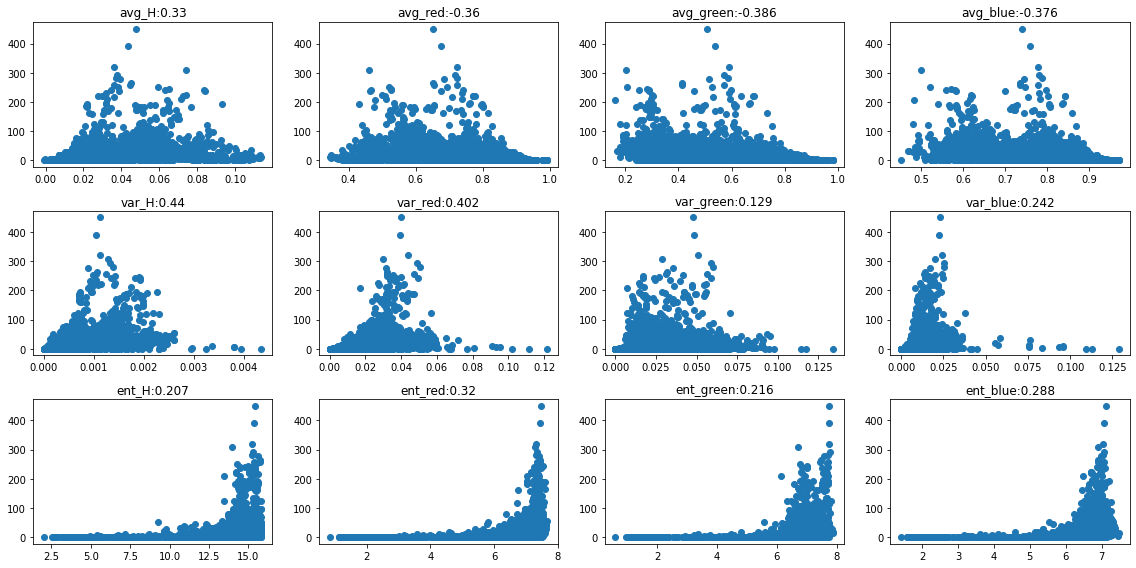

In [ ]:
from IPython.core.pylabtools import figsize
from scipy.stats import pearsonr
plt.figure(figsize=(16, 8))
y = feat_dataset.lymphocyte
col_names = list(feat_dataset.columns)
for i in range(1, 13):
    plt.subplot(3, 4, i)
    plt.tight_layout()
    #iterate each feature
    x = feat_dataset.iloc[:,(i-1)]
    #find the parson correlation coefficient
    corr = np.round(pearsonr(x, y)[0], decimals= 3)
    col = col_names[(i-1)]
    plt.title(col+':'+str(corr))
    plt.scatter(x , y )
    

##### PCA

In [ ]:
from sklearn import preprocessing
from sklearn.decomposition import IncrementalPCA
n_components = 3
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_flat = X.reshape(4981,-1)
X_ipca = ipca.fit_transform(preprocessing.normalize(X_flat))

In [ ]:
X_ipca

array([[ 0.02656747, -0.01220348,  0.01691186],
       [ 0.03553   , -0.02131477,  0.0174347 ],
       [ 0.02584352, -0.04091814,  0.02631127],
       ...,
       [ 0.0241806 , -0.03350744, -0.05086107],
       [ 0.02220802,  0.01610106, -0.02404065],
       [ 0.03124349, -0.0390407 ,  0.01082446]])

##### transfer learning features

Since pretrained CNN could detect some edges or classify some objects, which means that these parts could be "transfered". I freeze weights feature extraction part of pretrained VGG16 and modify the classifier network to be a regressor to generate features.

I have trained the model using codes below

```python
import torch                
import torch.nn as nn  
import torch.utils.data as data_utils
import torch.optim as optim 
from torchvision import datasets, transforms  
from torchsummary import summary
from tqdm import tqdm
import matplotlib.pyplot as plt
import torchvision.models as models
import numpy as np

### numpy to tensor
train_x = torch.from_numpy(np.moveaxis(X[np.where( (F == 1) | (F== 2))]/255.0, -1, 1))
train_y = torch.from_numpy( np.squeeze(np.array(Y)[np.where( (F == 1)  | (F== 2) ),3]) )

### data loader
train_dset = data_utils.TensorDataset(train_x, train_y)
train_loader = data_utils.DataLoader(train_dset, batch_size=50, shuffle=True, pin_memory=True)

### 
model = models.vgg16(pretrained=True)
my_net = nn.Sequential(
                      nn.Linear(4096, 256),
                      nn.ReLU(inplace = True),
                      nn.Dropout(p = 0.5),
                      nn.Linear(256,128),
                      nn.ReLU(inplace = True),
                      nn.Linear(128,1),
                      nn.ReLU(inplace = True) # I found that using relu to activate output 
                                              # shows better performance. Also, counts could not be negative
                       
)
model.classifier[6] = my_net

### model train on gpu
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = model.to(device)
summary(model, input_size=( 3, 256, 256))

def train(model, device,criterion, train_loader, optimizer,scheduler, epoch):
    model.train()
    pbar = tqdm(train_loader)
    correct = 0
    processed = 0
    for batch_idx, (data, target) in enumerate(pbar):
            
            # get samples
            target = target.unsqueeze(1)
            data, target = data.cpu().to(device, dtype = torch.float32), target.cpu().to(device, dtype = torch.float32)

            # Init
            optimizer.zero_grad()
            # Predict
            y_pred = model(data)
            
            # Calculate loss
            loss = criterion(y_pred, target)
            train_losses.append(loss)

            # Backpropagation
            loss.backward()
            optimizer.step()
    

    scheduler.step()     
    print('Finished Training Trainset')

# optimizer and loss function
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.00001,momentum=0.6)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
EPOCHS = 10

for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device,criterion,train_loader, optimizer, scheduler,epoch)

### save model for feature extraction
model_save_name = 'vgg_feature_extractor.pt'
path = F"/content/drive/MyDrive/fold_mod/{model_save_name}" 
torch.save(model.state_dict(), path)
```

In [ ]:
import torch                
import torch.nn as nn  
import torch.utils.data as data_utils
import torch.optim as optim 
from torchvision import datasets, transforms  
from torchsummary import summary
from tqdm import tqdm
import matplotlib.pyplot as plt
import torchvision.models as models
import numpy as np

In [ ]:
### Use data to finetune the pretrained model
train_x = torch.from_numpy(np.moveaxis(X[np.where( (F == 1) | (F== 2))]/255.0, -1, 1))
train_y = torch.from_numpy( np.squeeze(np.array(Y)[np.where( (F == 1)  | (F== 2) ),3]) )

In [ ]:
model = models.vgg16(pretrained=True)

# Freeze model weights
for param in model.parameters():
    param.requires_grad = False



my_net = nn.Sequential(
                      nn.Linear(4096, 256),
                      nn.ReLU(inplace = True),
                      nn.Dropout(p = 0.5),
                      nn.Linear(256,128),
                      nn.ReLU(inplace = True),
                      nn.Linear(128,1),
                      nn.ReLU(inplace = True)
                       
)
### get the architecture of model
model.classifier[6] = my_net



Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [ ]:

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = model.to(device)
### The model is trained only on fold1&2, and generates features to all the examples
train_x = torch.Tensor(np.moveaxis(X.astype('float32')/255.0, -1, 1)).to(device)

###load the weights

model.load_state_dict(torch.load('/content/drive/MyDrive/fold_mod/vgg_feature_extractor.pt'))

model.eval()
batch = list(np.arange(0, 4981 , 100))
batch.append( 4981 )
res_tensor = torch.Tensor().to(device)
for i, k in zip(batch[0:-1], batch[1:]):
  res_tensor = torch.cat((res_tensor, model(train_x[i:k])))


cuda


In [ ]:

batch = list(np.arange(0, 4981 , 100))
batch.append( 4981 )
res_tensor = torch.Tensor().to(device)
### Avoid GPU Ram Crash...
for i, k in zip(batch[0:-1], batch[1:]):
  res_tensor = torch.cat((res_tensor, model(train_x[i:k])))
extracted_feat = res_tensor.cpu().detach().numpy()

### ii.

In [ ]:
df_pca = pd.DataFrame(X_ipca, columns = ['pca_1', 'pca_2', 'pca_3'])
df_transfer_learning = pd.DataFrame(extracted_feat, columns = ['transfer_learning_feature'])
all_feature = pd.concat([df_pca, df_transfer_learning, feat_dataset], axis = 1)

In [ ]:
all_feature

,pca_1,pca_2,pca_3,transfer_learning_feature,avg_H,avg_red,avg_green,avg_blue,var_H,var_red,var_green,var_blue,ent_H,ent_red,ent_green,ent_blue,lymphocyte
0,0.026567,-0.012203,0.016912,3.181124,0.028605,0.775287,0.666784,0.864555,0.000512,0.020474,0.028851,0.007413,15.118937,7.063311,7.343395,6.344929,0
1,0.035530,-0.021315,0.017435,1.617051,0.026076,0.794013,0.691662,0.873952,0.000533,0.021799,0.033510,0.007838,14.800732,6.976390,7.268564,6.295099,1
2,0.025844,-0.040918,0.026311,2.685422,0.029113,0.773916,0.667299,0.862993,0.000586,0.023675,0.035489,0.008239,14.575099,6.973113,7.158988,6.306477,3
3,0.041089,0.007646,-0.010933,1.489340,0.023963,0.807823,0.708420,0.878354,0.000505,0.022087,0.037501,0.007899,14.493204,6.846146,7.157774,6.219650,0
4,0.000830,0.003019,0.029926,2.316849,0.033358,0.738723,0.605632,0.839980,0.000476,0.018970,0.025265,0.008259,15.173962,7.107354,7.331547,6.480956,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,0.026491,-0.005372,-0.011687,4.829183,0.017122,0.833618,0.676521,0.851176,0.000275,0.014829,0.025066,0.008933,14.971538,6.744447,7.253116,6.481390,17
4977,0.023574,0.032210,-0.028648,2.158301,0.020583,0.809485,0.649724,0.820723,0.000568,0.027163,0.052405,0.016267,14.522170,6.802577,7.270968,6.618228,9
4978,0.024181,-0.033507,-0.050861,1.187589,0.023932,0.792709,0.653538,0.819992,0.000645,0.032147,0.062861,0.018634,14.114807,6.758527,7.132989,6.540363,1
4979,0.022208,0.016101,-0.024041,2.847576,0.023750,0.793137,0.646565,0.818171,0.000663,0.032387,0.061653,0.019179,14.124510,6.750199,7.182015,6.550184,8


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr, spearmanr

all_feature= pd.read_csv('/content/drive/MyDrive/all_feature.csv')
test = all_feature.iloc[np.where (F == 3) ]
test_y = test.lymphocyte

def performance(pred,y):
  '''
   RMSE, Pearson Correlation Coefficient, Spearman Correlation Coefficient and R2 score
  '''
  rmse = np.sqrt(mean_absolute_error(pred,y))
  pearson = pearsonr(pred, y)[0]
  spearman = spearmanr(pred, y)[0]
  r2 = r2_score(pred,y)

  df = pd.DataFrame([[rmse], [pearson], [spearman], [r2]]).transpose()
  df.columns =  ['RMSE', 'Pearson Correlation Coefficient','Spearman Correlation Coefficeint', 'R2 score']                                                              
  
  return df





In [ ]:
train = all_feature.iloc[np.where( (F == 1) | (F==2))]
test = all_feature.iloc[np.where (F == 3) ]

In [ ]:
train_x = train.drop(columns = ['lymphocyte'])
train_y = train.lymphocyte
test_x = test.drop(columns = ['lymphocyte'])
test_y = test.lymphocyte

In [ ]:
from sklearn import linear_model
train_x = train.drop(columns = ['lymphocyte'])
train_y = train.lymphocyte
olsr = linear_model.LinearRegression(normalize=True)


olsr.fit(train_x, train_y)

pred_olsr = olsr.predict(test_x)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [ ]:
performance(pred_olsr  , test_y)

,RMSE,Pearson Correlation Coefficient,Spearman Correlation Coefficeint,R2 score
0,3.574553,0.681728,0.711529,-0.074086


In [ ]:
olsr.coef_

array([-2.71438721e+02, -1.05255900e+01, -1.64415322e+01,  2.00022057e+00,
       -3.24968931e+02, -1.09255572e+02,  1.07199677e+02,  1.47078756e+02,
        3.79192594e+04,  5.14851437e+02, -2.05324583e+02, -9.74663369e+02,
        5.42895801e+00, -3.70171315e+00, -1.26358599e+01,  8.60960158e+00])

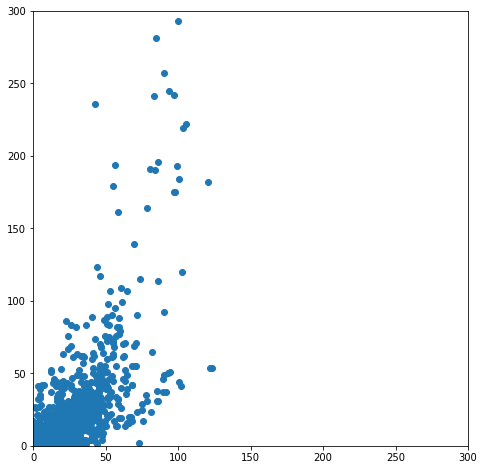

In [ ]:
plt.figure(figsize = (8,8))
plt.xlim(0, 300)
plt.ylim(0, 300)
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(pred_olsr  ,test_y )

In [ ]:
from sklearn.svm import SVR
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
regr = make_pipeline(StandardScaler(), SVR(C=1000, epsilon=0.3))
regr.fit(train_x, train_y)
pred_svr = regr.predict(test_x)

In [ ]:
performance(pred_svr , test_y)

,RMSE,Pearson Correlation Coefficient,Spearman Correlation Coefficeint,R2 score
0,3.41211,0.757112,0.697234,0.456536


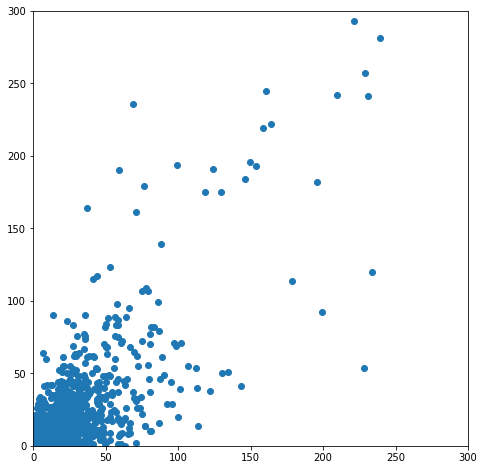

In [ ]:
plt.figure(figsize = (8,8))
plt.xlim(0, 300)
plt.ylim(0, 300)
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(pred_svr  ,test_y )

## Question No.3

##### i.

In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
X = np.load("/content/drive/MyDrive/images.npy")#read images
Y = pd.read_csv('/content/drive/MyDrive/counts.csv')#read cell counts 
F = np.loadtxt('/content/drive/MyDrive/split.txt')#read fold information

import torch                
import torch.nn  as nn
from torch.nn import Linear, ReLU,  Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
import torch.nn.functional as Func
import torch.utils.data as data_utils
import torch.optim as optim 
from torchvision import datasets, transforms  
from torchsummary import summary
from tqdm import tqdm
import matplotlib.pyplot as plt
import torchvision.models as models
import numpy as np
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

# Residual block
def conv3x3(in_channels, out_channels, stride=1):
    return Conv2d(in_channels, out_channels, kernel_size=3, 
                     stride=stride, padding=1, bias=False)
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = conv3x3(in_channels, out_channels, stride)
        self.bn1 = BatchNorm2d(out_channels)
        self.relu = ReLU(inplace=True)
        self.conv2 = conv3x3(out_channels, out_channels)
        self.bn2 = BatchNorm2d(out_channels)
        
        
    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        
        out += residual
        out = self.relu(out)
        return out


class Res_CNN(Module):   
    def __init__(self):
        super(Res_CNN, self).__init__()

        self.res_net1 = ResidualBlock(3,3)
        self.res_net2 = ResidualBlock(3,3)
        self.res_net3 = ResidualBlock(3,3)
        
        self.cnn_layers = Sequential(
            # Defining a 2D convolution layer
            Conv2d(3, 5, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(5),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            Conv2d(5, 5, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(5),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            Conv2d(5, 5, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(5),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            Conv2d(5, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            Conv2d(4, 2, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(2),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=1, stride=1),
        )

        self.linear_layers = Sequential(
            Linear(512, 256),

            ReLU(inplace=True),
            Dropout(0.3),
            Linear(256, 10),
            ReLU(inplace=True),
            Dropout(0.2),
            Linear(10,1),
            ReLU(inplace=True),
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.res_net1(x)
        x = self.res_net2(x)
        x = self.res_net3(x)
        
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = x.reshape(x.size()[0], -1 )
        x = self.linear_layers(x)
        return x
model = Res_CNN()

Mounted at /content/drive


In [2]:
import math
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
  

train_x =  torch.from_numpy((np.moveaxis(X[np.where( (F == 1) | (F== 2))]/255.0, -1, 1)))
train_y = (torch.from_numpy( np.squeeze(np.array(Y)[np.where( (F == 1)  | (F== 2) ),2]) ))


train_test_ratio = [math.ceil(train_x.size()[0]*0.9), int(train_x.size()[0]*0.1)]
### data loader
train_dset = data_utils.TensorDataset(train_x, train_y)
train_dataset, val_dataset = torch.utils.data.random_split(train_dset, train_test_ratio)

train_loader = data_utils.DataLoader(train_dataset, batch_size=128, shuffle=True, pin_memory=True)
val_loader = data_utils.DataLoader(val_dataset, batch_size=128, shuffle=True, pin_memory=True)

###### model structure

My model consists of 3 identity residual block, five CNN layers with batchnorm and maxpooling,
followed by MLP for regression.

And that is the best structure I found, I have tried serval complicated model like UNet. But it
is hard to train.

In [2]:
# Residual block
def conv3x3(in_channels, out_channels, stride=1):
    return Conv2d(in_channels, out_channels, kernel_size=3, 
                     stride=stride, padding=1, bias=False)
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = conv3x3(in_channels, out_channels, stride)
        self.bn1 = BatchNorm2d(out_channels)
        self.relu = ReLU(inplace=True)
        self.conv2 = conv3x3(out_channels, out_channels)
        self.bn2 = BatchNorm2d(out_channels)
        
        
    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        
        out += residual
        out = self.relu(out)
        return out


class Res_CNN(Module):   
    def __init__(self):
        super(Res_CNN, self).__init__()

        self.res_net1 = ResidualBlock(3,3)
        self.res_net2 = ResidualBlock(3,3)
        self.res_net3 = ResidualBlock(3,3)
        
        self.cnn_layers = Sequential(
            # Defining a 2D convolution layer
            Conv2d(3, 5, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(5),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            Conv2d(5, 5, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(5),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            Conv2d(5, 5, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(5),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            Conv2d(5, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            Conv2d(4, 2, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(2),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=1, stride=1),
        )

        self.linear_layers = Sequential(
            Linear(512, 256),

            ReLU(inplace=True),
            Dropout(0.3),
            Linear(256, 10),
            ReLU(inplace=True),
            Dropout(0.2),
            Linear(10,1),
            ReLU(inplace=True),
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.res_net1(x)
        x = self.res_net2(x)
        x = self.res_net3(x)
        
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = x.reshape(x.size()[0], -1 )
        x = self.linear_layers(x)
        return x
model = Res_CNN()

In [ ]:
model.to(device)
summary(model, input_size = (3,256,256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 3, 256, 256]              81
       BatchNorm2d-2          [-1, 3, 256, 256]               6
              ReLU-3          [-1, 3, 256, 256]               0
            Conv2d-4          [-1, 3, 256, 256]              81
       BatchNorm2d-5          [-1, 3, 256, 256]               6
              ReLU-6          [-1, 3, 256, 256]               0
     ResidualBlock-7          [-1, 3, 256, 256]               0
            Conv2d-8          [-1, 3, 256, 256]              81
       BatchNorm2d-9          [-1, 3, 256, 256]               6
             ReLU-10          [-1, 3, 256, 256]               0
           Conv2d-11          [-1, 3, 256, 256]              81
      BatchNorm2d-12          [-1, 3, 256, 256]               6
             ReLU-13          [-1, 3, 256, 256]               0
    ResidualBlock-14          [-1, 3, 2

###### model train

In [ ]:
train_losses = []
val_losses = []
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
def r2_loss(output, target):
    
    target_mean = torch.mean(target)
    ss_tot = torch.sum((target - target_mean) ** 2)
    ss_res = torch.sum((target - output) ** 2)
    r2 = 1 - ss_res / ss_tot
    return r2
def RMSELoss(yhat,y):
    return torch.sqrt(torch.mean((yhat-y)**2))

def myLoss(yhat,y):
  '''
    r2 is the best metric for this problem, but it could be negative and has no inf,
    so I combine it with RMSE then it should 
    '''
  rmse = RMSELoss(yhat,y)
  r2 = -r2_loss(yhat, y)
  return r2*6 + rmse


criterion = myLoss
def train(model, device,criterion, train_loader, optimizer,scheduler):
    model.train()
    pbar = tqdm(train_loader)
    min_val_loss = np.inf
    train_loss = 0
    for batch_idx, (data, target) in enumerate(pbar):
      # get samples
      target = target.unsqueeze(1)
      data, target = data.cpu().to(device, dtype = torch.float32), target.cpu().to(device, dtype = torch.float32)

      # Init
      optimizer.zero_grad()
      # Predict
      y_pred = model(data)

      # Calculate loss
      loss = criterion(y_pred, target)
      

      # Backpropagation
      loss.backward()
      train_loss += loss.item()
      optimizer.step()
    #scheduler.step()

    train_losses.append(train_loss/len(train_loader))
    print("train loss : ", train_loss/len(train_loader))

      
      


# optimizer and loss function

optimizer = optim.RMSprop(model.parameters(), lr=0.001)#optim.Adam(model.parameters(), lr=0.00002)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.6)
EPOCHS = 20

min_val_loss =np.inf
model.to(device)
print(model)
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device,criterion,train_loader, optimizer, scheduler)
    val_loss = 0
    model.eval()
    for batch_idx, (data, target) in enumerate(tqdm(val_loader)):
      # get samples
      target = target.unsqueeze(1)
      data, target = data.cpu().to(device, dtype = torch.float32), target.cpu().to(device, dtype = torch.float32)
      y_pred = model(data)

      # Calculate loss
      loss = criterion(y_pred, target)
      val_loss +=loss.item()
    val_losses.append(loss.detach().cpu().numpy()/len(val_loader)) 
    if min_val_loss > val_loss:
        print("validation loss : ", val_loss/len(val_loader))
        min_val_loss = val_loss

         
        # Saving State Dict
        model_save_name = 'Res_CNN_weights3.pt'
        path = F"/content/drive/MyDrive/fold_mod/{model_save_name}" 
        torch.save(model.state_dict(), path)

cuda
Res_CNN(
  (res_net1): ResidualBlock(
    (conv1): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (res_net2): ResidualBlock(
    (conv1): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (res_net3): ResidualBlock(
    (conv1): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(3

100%|██████████| 24/24 [00:10<00:00,  2.35it/s]


train loss :  23.476797103881836


100%|██████████| 3/3 [00:00<00:00,  6.99it/s]


validation loss :  38.60940170288086
EPOCH: 1


100%|██████████| 24/24 [00:09<00:00,  2.43it/s]


train loss :  15.07859100898107


100%|██████████| 3/3 [00:00<00:00,  6.13it/s]


validation loss :  29.43950017293294
EPOCH: 2


100%|██████████| 24/24 [00:09<00:00,  2.56it/s]


train loss :  13.100343505541483


100%|██████████| 3/3 [00:00<00:00,  6.61it/s]


validation loss :  19.87559445699056
EPOCH: 3


100%|██████████| 24/24 [00:09<00:00,  2.57it/s]


train loss :  12.060559074083963


100%|██████████| 3/3 [00:00<00:00,  6.61it/s]


validation loss :  15.761812210083008
EPOCH: 4


100%|██████████| 24/24 [00:09<00:00,  2.55it/s]


train loss :  12.04793014129003


100%|██████████| 3/3 [00:00<00:00,  7.17it/s]


validation loss :  11.55316956837972
EPOCH: 5


100%|██████████| 24/24 [00:09<00:00,  2.56it/s]


train loss :  11.100379129250845


100%|██████████| 3/3 [00:00<00:00,  6.88it/s]


EPOCH: 6


100%|██████████| 24/24 [00:09<00:00,  2.57it/s]


train loss :  11.523875196774801


100%|██████████| 3/3 [00:00<00:00,  7.08it/s]


EPOCH: 7


100%|██████████| 24/24 [00:09<00:00,  2.54it/s]


train loss :  11.309987445672354


100%|██████████| 3/3 [00:00<00:00,  6.84it/s]


EPOCH: 8


100%|██████████| 24/24 [00:09<00:00,  2.55it/s]


train loss :  10.800080478191376


100%|██████████| 3/3 [00:00<00:00,  6.86it/s]


EPOCH: 9


100%|██████████| 24/24 [00:09<00:00,  2.56it/s]


train loss :  10.313080648581186


100%|██████████| 3/3 [00:00<00:00,  6.80it/s]


EPOCH: 10


100%|██████████| 24/24 [00:09<00:00,  2.51it/s]


train loss :  9.623981952667236


100%|██████████| 3/3 [00:00<00:00,  6.81it/s]


EPOCH: 11


100%|██████████| 24/24 [00:09<00:00,  2.54it/s]


train loss :  8.11575218041738


100%|██████████| 3/3 [00:00<00:00,  6.72it/s]


EPOCH: 12


100%|██████████| 24/24 [00:09<00:00,  2.55it/s]


train loss :  10.132488091786703


100%|██████████| 3/3 [00:00<00:00,  6.73it/s]


EPOCH: 13


100%|██████████| 24/24 [00:09<00:00,  2.56it/s]


train loss :  9.933202743530273


100%|██████████| 3/3 [00:00<00:00,  6.70it/s]


validation loss :  10.67460823059082
EPOCH: 14


100%|██████████| 24/24 [00:09<00:00,  2.56it/s]


train loss :  9.205603063106537


100%|██████████| 3/3 [00:00<00:00,  6.88it/s]


EPOCH: 15


100%|██████████| 24/24 [00:09<00:00,  2.56it/s]


train loss :  8.221280813217163


100%|██████████| 3/3 [00:00<00:00,  6.70it/s]


EPOCH: 16


100%|██████████| 24/24 [00:09<00:00,  2.56it/s]


train loss :  10.238022645314535


100%|██████████| 3/3 [00:00<00:00,  6.92it/s]


validation loss :  9.950235366821289
EPOCH: 17


100%|██████████| 24/24 [00:09<00:00,  2.55it/s]


train loss :  7.840515077114105


100%|██████████| 3/3 [00:00<00:00,  6.69it/s]


EPOCH: 18


100%|██████████| 24/24 [00:09<00:00,  2.57it/s]


train loss :  8.162486970424652


100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


EPOCH: 19


100%|██████████| 24/24 [00:09<00:00,  2.56it/s]


train loss :  8.553623616695404


100%|██████████| 3/3 [00:00<00:00,  6.45it/s]

validation loss :  7.654984792073567


Text(0.5, 1.0, 'Convergence Plot')

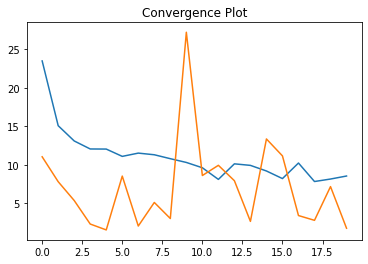

In [ ]:
idx = range(0,EPOCHS,1)
plt.plot( idx, train_losses, label = 'Train Loss')
plt.plot( idx,val_losses, label = 'Validation Loss')
plt.title("Convergence Plot")

###### model evaluation

In [ ]:
model = Res_CNN()
model.load_state_dict(torch.load('/content/drive/MyDrive/fold_mod/Res_CNN_weights.pt'))

<All keys matched successfully>

In [ ]:
test_x = torch.from_numpy(np.moveaxis(X[np.where( (F == 3))]/255.0, -1, 1))
test_y = torch.from_numpy( np.squeeze(np.array(Y)[np.where( (F == 3)  ),2]) )

### data loader
mse_list = []
pred_list = []
test_dset = data_utils.TensorDataset(test_x, test_y)
# use batch_size 1 without shuffle do the same that push all test dataset to make prediction. But GPU Ram could not 
# manage such a big matrix.
test_loader = data_utils.DataLoader(test_dset, batch_size=1, shuffle=False, pin_memory=True)

model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
model.to(device)
def make_pred(model, test_x):
  pred_list = []
  with torch.no_grad():
      
      for images, labels in test_loader:
          images = images.to(device)
          
          outputs = model(images.float())
          pred_list.append(outputs.detach().cpu().numpy())
  return pred_list
        
pred = make_pred(model , test_x)

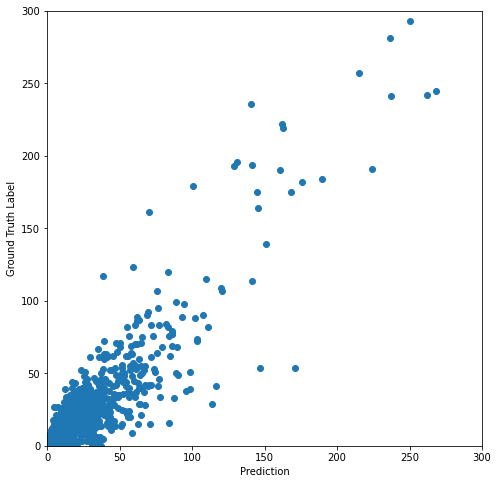

In [ ]:
plt.figure(figsize = (8,8))
plt.xlim(0, 300)
plt.ylim(0, 300)
plt.xlabel('Prediction')
plt.ylabel('Ground Truth Label')
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(np.squeeze(np.array(pred))  ,test_y )

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr, spearmanr

all_feature= pd.read_csv('/content/drive/MyDrive/all_feature.csv')
test = all_feature.iloc[np.where (F == 3) ]
test_y = test.lymphocyte
def performance(pred,y):
  rmse = np.sqrt(mean_absolute_error(pred,y))
  pearson = pearsonr(pred, y)[0]
  spearman = spearmanr(pred, y)[0]
  r2 = r2_score(pred,y)

  df = pd.DataFrame([[rmse], [pearson], [spearman], [r2]]).transpose()
  df.columns =  ['RMSE', 'Pearson Correlation Coefficient','Spearman Correlation Coefficeint', 'R2 score']                                                              
  
  return df
performance(np.squeeze(np.array(pred)), test_y)

,RMSE,Pearson Correlation Coefficient,Spearman Correlation Coefficeint,R2 score
0,2.713826,0.902899,0.8439,0.786929


Compared to baseline of the competition (0.85), although it is still lower than that, considering the complexity
of the model, it is not a bad performance I guess...

##### ii

In [3]:
def r2_loss(output, target):
    target_mean = torch.mean(target)
    ss_tot = torch.sum((target - target_mean) ** 2)
    ss_res = torch.sum((target - output) ** 2)
    r2 = 1 - ss_res / ss_tot
    return r2
def RMSELoss(yhat,y):
    return torch.sqrt(torch.mean((yhat-y)**2))

def myLoss(yhat,y):
  rmse = RMSELoss(yhat,y)
  r2 = -r2_loss(yhat, y)
  return r2*6 + rmse
def train(model, device,criterion, train_loader, optimizer):
    train_losses = []
    model.train()
    pbar = tqdm(train_loader)
    min_val_loss = np.inf
    train_loss = 0
    for batch_idx, (data, target) in enumerate(pbar):
      # get samples
      target = target.unsqueeze(1)
      data, target = data.cpu().to(device, dtype = torch.float32), target.cpu().to(device, dtype = torch.float32)

      # Init
      optimizer.zero_grad()
      # Predict
      y_pred = model(data)

      # Calculate loss
      loss = criterion(y_pred, target)
      

      # Backpropagation
      loss.backward()
      train_loss += loss.item()
      optimizer.step()
    #scheduler.step()

    train_losses.append(train_loss/len(train_loader))
    print("train loss : ", train_loss/len(train_loader))


The pipeline of K-fold CV is implemented below.

(After I finish it, I found that there is no enough RAM space to store whole data to complete 3-fold CV inside the class. So I have to move loops outside the class instead of save data inside it and some operation seems a little bit tedious...

In [21]:
from sklearn.model_selection import KFold
import math


class k_fold:

    
  def __init__(self) :
      #initialize with data
      
      self.test_loaders = None
      



  def get_data(self, X,y,train_index, test_index):
  
    train_loaders = []
   
    val_loaders = []
   
    test_loaders = []
    


   # Use splitted data to get the data loader
    
      
    X_train = torch.from_numpy(np.moveaxis(X[train_index]/255.0, -1, 1))
    X_test = torch.from_numpy(np.moveaxis(X[test_index]/255.0, -1, 1))
    y_train = torch.from_numpy((np.squeeze(y)[train_index]))
    y_test = torch.from_numpy((np.squeeze(y)[test_index]))
    
    train_test_ratio = [math.ceil(X_train.size()[0]*0.9), int(X_train.size()[0]*0.1)]
    train_dset = data_utils.TensorDataset(X_train, y_train)
    train_dataset, val_dataset = torch.utils.data.random_split(train_dset, train_test_ratio)  

    train_loader = data_utils.DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=True)
    val_loader = data_utils.DataLoader(val_dataset, batch_size=32, shuffle=True, pin_memory=True)
    test_dset = data_utils.TensorDataset(X_test, y_test)
    test_loader = data_utils.DataLoader(test_dset, batch_size=1, shuffle=False, pin_memory=True)

    train_loaders.append(train_loader)
    val_loaders.append(val_loader)
    test_loaders.append(test_loader)
    self.test_loaders = test_loaders
    return train_loaders, val_loaders, test_loaders

  def get_model(self):
    
    model = Res_CNN()
    return model

  
  def Train(self, EPOCHS,temp_train_loader, temp_val_loader, temp_model_save_name,lr = 0.0001):
    #declare a new model
    model =self.get_model()
    
    optimizer = optim.RMSprop(model.parameters(), lr)
    model.to(device)
    min_val_loss =np.inf
    criterion = RMSELoss
    
    for epoch in range(EPOCHS):
      
      val_losses = []
      print("EPOCH:", epoch)
      train(model, device,criterion,temp_train_loader, optimizer)
      val_loss = 0
      model.eval()
      for batch_idx, (data, target) in enumerate(tqdm(temp_val_loader)):
        # get samples
        target = target.unsqueeze(1)
        data, target = data.cpu().to(device, dtype = torch.float32), target.cpu().to(device, dtype = torch.float32)
        y_pred = model(data)

        # Calculate loss
        loss = criterion(y_pred, target)
        val_loss +=loss.item()
        val_losses.append(loss.detach().cpu().numpy()/len(temp_val_loader)) 
      if min_val_loss > val_loss:

        print("validation loss : ", val_loss/len(temp_val_loader))
        min_val_loss = val_loss
        
        # Saving State Dict
        model_save_name = temp_model_save_name
        path = F"/content/drive/MyDrive/fold_mod/{model_save_name}" 
        torch.save(model.state_dict(), path)
    
  def predict(self, model, test_loader):
    model.eval()
    model.to(device)
    pred_list = []
    label_list = []
    with torch.no_grad():
    
        for images, labels in test_loader:
            images = images.to(device)
        
            outputs = model(images.float())
            pred_list.append(outputs.detach().cpu().numpy())
            label_list.append(labels.detach().cpu().numpy())
    return pred_list, label_list
  
  def CV(self, EPOCHS, X,y, train_index, test_index):
    train_loaders, val_loaders, test_loaders = self.get_data(X, y, train_index, test_index)
    pred = []
    label = []
 
    #Get data
    temp_train_loader = train_loaders[0]
    temp_val_loader = val_loaders[0]
    temp_test_loader = test_loaders[0]
    print("-----{} fold is processing------".format(0))
    temp_model_save_name = 'cv_model_weights' + str(0)
    #train step
    train_losses = []
    val_losses = []
    self.Train(EPOCHS,temp_train_loader, temp_val_loader,temp_model_save_name)

    #Retrive model with best validation performance
    model = self.get_model()
    path = F"/content/drive/MyDrive/fold_mod/{temp_model_save_name}" 
    model.load_state_dict(torch.load(path))

    #prediction step
    temp_pred,temp_label = self.predict( model, temp_test_loader)
    pred.append(temp_pred)
    label.append(temp_label)

    return pred, label
  def get_res(self,EPOCHS,X ,y, train_index, test_index):
  
    pred, label = self.CV(EPOCHS, X,y, train_index, test_index)
    pred, label = np.squeeze(np.array(pred)), np.squeeze(np.array(label))
 
    return pred, label

  



In [6]:
three_fold_train = [np.where( ( (F == 3) | (F ==2) ))[0], np.where( ( (F == 3) | (F ==1) ))[0],
                        np.where( ( (F == 1) | (F ==2) ))[0]]
three_fold_test = [np.where( ( (F == 1 )))[0], np.where( (F == 2 ))[0],
                        np.where( (F == 3 ))[0]]


   # Use splitted data to get the data loader
for train_index, test_index in zip(three_fold_train, three_fold_test):
  print(train_index)

[   0    1    2 ... 4978 4979 4980]
[   0    1    2 ... 4978 4979 4980]
[ 136  137  138 ... 4866 4867 4868]


For 3-fold CV, we only train 15 epochs here, and to train a well performed could cost time. I guess the results would be worse than that in *i.* , which I spent a lot of time to train.

In [4]:
test_y =(np.array(Y)[:,2])
kfold = k_fold()


train_list = [np.where( ( (F == 3) | (F ==2) ))[0], np.where( ( (F == 1) | (F ==3) ))[0], np.where( ( (F == 1) | (F ==2) ))[0] ]
test_list = [np.where( ( (F == 1)  ))[0], np.where( ( (F == 2)  ))[0], np.where( ( (F == 3)) )[0] ]
pred = []
label = []
for a, b in zip(train_list, test_list):
  temp_pred, temp_label = kfold.get_res( 15, X,test_y,a, b)
  pred.append(temp_pred)
  label.append(temp_label)

-----0 fold is processing------
EPOCH: 0


100%|██████████| 95/95 [00:10<00:00,  8.72it/s]


train loss :  26.227398285112884


100%|██████████| 11/11 [00:00<00:00, 25.67it/s]


validation loss :  19.727198774164375
EPOCH: 1


100%|██████████| 95/95 [00:10<00:00,  9.10it/s]


train loss :  20.36046213350798


100%|██████████| 11/11 [00:00<00:00, 25.03it/s]


validation loss :  11.548239361156117
EPOCH: 2


100%|██████████| 95/95 [00:10<00:00,  9.12it/s]


train loss :  16.907120102330257


100%|██████████| 11/11 [00:00<00:00, 25.60it/s]


validation loss :  7.562143672596324
EPOCH: 3


100%|██████████| 95/95 [00:10<00:00,  9.06it/s]


train loss :  16.278531576457777


100%|██████████| 11/11 [00:00<00:00, 24.71it/s]


EPOCH: 4


100%|██████████| 95/95 [00:10<00:00,  9.07it/s]


train loss :  14.040294712468198


100%|██████████| 11/11 [00:00<00:00, 24.93it/s]


EPOCH: 5


100%|██████████| 95/95 [00:10<00:00,  9.04it/s]


train loss :  13.011658392454448


100%|██████████| 11/11 [00:00<00:00, 25.53it/s]


EPOCH: 6


100%|██████████| 95/95 [00:10<00:00,  8.64it/s]


train loss :  13.032328462600708


100%|██████████| 11/11 [00:00<00:00, 25.39it/s]


EPOCH: 7


100%|██████████| 95/95 [00:10<00:00,  9.02it/s]


train loss :  13.04727043352629


100%|██████████| 11/11 [00:00<00:00, 25.70it/s]


EPOCH: 8


100%|██████████| 95/95 [00:10<00:00,  9.01it/s]


train loss :  11.471954420993203


100%|██████████| 11/11 [00:00<00:00, 25.68it/s]


EPOCH: 9


100%|██████████| 95/95 [00:10<00:00,  8.95it/s]


train loss :  12.647283739792673


100%|██████████| 11/11 [00:00<00:00, 24.85it/s]


validation loss :  3.424974875016646
EPOCH: 10


100%|██████████| 95/95 [00:10<00:00,  9.06it/s]


train loss :  12.578639386829577


100%|██████████| 11/11 [00:00<00:00, 25.17it/s]


EPOCH: 11


100%|██████████| 95/95 [00:10<00:00,  9.09it/s]


train loss :  10.736359335246838


100%|██████████| 11/11 [00:00<00:00, 25.28it/s]


EPOCH: 12


100%|██████████| 95/95 [00:10<00:00,  9.01it/s]


train loss :  11.290247400183427


100%|██████████| 11/11 [00:00<00:00, 24.88it/s]


EPOCH: 13


100%|██████████| 95/95 [00:10<00:00,  9.01it/s]


train loss :  11.717938139564113


100%|██████████| 11/11 [00:00<00:00, 25.13it/s]


EPOCH: 14


100%|██████████| 95/95 [00:10<00:00,  9.03it/s]


train loss :  11.143712166736


100%|██████████| 11/11 [00:00<00:00, 24.99it/s]


-----0 fold is processing------
EPOCH: 0


100%|██████████| 91/91 [00:10<00:00,  9.02it/s]


train loss :  36.209318957486


100%|██████████| 11/11 [00:00<00:00, 26.07it/s]


validation loss :  1049.8043377616189
EPOCH: 1


100%|██████████| 91/91 [00:10<00:00,  9.01it/s]


train loss :  36.40984809791649


100%|██████████| 11/11 [00:00<00:00, 26.34it/s]


validation loss :  34.621502442793414
EPOCH: 2


100%|██████████| 91/91 [00:10<00:00,  8.97it/s]


train loss :  26.703888741168345


100%|██████████| 11/11 [00:00<00:00, 26.66it/s]


validation loss :  24.12818228114735
EPOCH: 3


100%|██████████| 91/91 [00:10<00:00,  9.02it/s]


train loss :  14.546632923922695


100%|██████████| 11/11 [00:00<00:00, 26.50it/s]


validation loss :  11.267445607618852
EPOCH: 4


100%|██████████| 91/91 [00:10<00:00,  9.03it/s]


train loss :  12.804496807056468


100%|██████████| 11/11 [00:00<00:00, 25.85it/s]


validation loss :  8.090227051214738
EPOCH: 5


100%|██████████| 91/91 [00:10<00:00,  9.00it/s]


train loss :  11.279619033520039


100%|██████████| 11/11 [00:00<00:00, 25.98it/s]


EPOCH: 6


100%|██████████| 91/91 [00:10<00:00,  9.07it/s]


train loss :  10.58734693632021


100%|██████████| 11/11 [00:00<00:00, 26.04it/s]


validation loss :  7.639812469482422
EPOCH: 7


100%|██████████| 91/91 [00:10<00:00,  9.03it/s]


train loss :  11.201854464771984


100%|██████████| 11/11 [00:00<00:00, 25.67it/s]


EPOCH: 8


100%|██████████| 91/91 [00:10<00:00,  9.08it/s]


train loss :  10.207032816750663


100%|██████████| 11/11 [00:00<00:00, 26.04it/s]


validation loss :  6.383817542682994
EPOCH: 9


100%|██████████| 91/91 [00:10<00:00,  8.95it/s]


train loss :  10.548286904345503


100%|██████████| 11/11 [00:00<00:00, 25.72it/s]


EPOCH: 10


100%|██████████| 91/91 [00:10<00:00,  9.07it/s]


train loss :  9.538701628590678


100%|██████████| 11/11 [00:00<00:00, 26.66it/s]


validation loss :  6.232737801291726
EPOCH: 11


100%|██████████| 91/91 [00:10<00:00,  8.95it/s]


train loss :  10.038666447440347


100%|██████████| 11/11 [00:00<00:00, 25.44it/s]


EPOCH: 12


100%|██████████| 91/91 [00:10<00:00,  9.07it/s]


train loss :  9.840381900032797


100%|██████████| 11/11 [00:00<00:00, 26.78it/s]


EPOCH: 13


100%|██████████| 91/91 [00:10<00:00,  9.04it/s]


train loss :  9.948519030770102


100%|██████████| 11/11 [00:00<00:00, 25.34it/s]


EPOCH: 14


100%|██████████| 91/91 [00:10<00:00,  9.00it/s]


train loss :  9.298511112129296


100%|██████████| 11/11 [00:00<00:00, 25.42it/s]


-----0 fold is processing------
EPOCH: 0


100%|██████████| 95/95 [00:10<00:00,  8.97it/s]


train loss :  18.408460652200798


100%|██████████| 11/11 [00:00<00:00, 24.81it/s]


validation loss :  10.705383387478916
EPOCH: 1


100%|██████████| 95/95 [00:10<00:00,  9.02it/s]


train loss :  13.218079692439028


100%|██████████| 11/11 [00:00<00:00, 24.37it/s]


EPOCH: 2


100%|██████████| 95/95 [00:10<00:00,  8.86it/s]


train loss :  11.7855208447105


100%|██████████| 11/11 [00:00<00:00, 25.02it/s]


validation loss :  6.744602246717974
EPOCH: 3


100%|██████████| 95/95 [00:10<00:00,  9.01it/s]


train loss :  10.820242003390664


100%|██████████| 11/11 [00:00<00:00, 25.28it/s]


EPOCH: 4


100%|██████████| 95/95 [00:10<00:00,  8.96it/s]


train loss :  11.728865518068012


100%|██████████| 11/11 [00:00<00:00, 25.25it/s]


validation loss :  6.210564613342285
EPOCH: 5


100%|██████████| 95/95 [00:10<00:00,  9.01it/s]


train loss :  10.164705898887233


100%|██████████| 11/11 [00:00<00:00, 25.28it/s]


EPOCH: 6


100%|██████████| 95/95 [00:10<00:00,  8.98it/s]


train loss :  10.430208090731972


100%|██████████| 11/11 [00:00<00:00, 24.92it/s]


validation loss :  3.9331088066101074
EPOCH: 7


100%|██████████| 95/95 [00:10<00:00,  9.06it/s]


train loss :  10.494211061377275


100%|██████████| 11/11 [00:00<00:00, 24.13it/s]


EPOCH: 8


100%|██████████| 95/95 [00:10<00:00,  8.96it/s]


train loss :  10.417800526869925


100%|██████████| 11/11 [00:00<00:00, 25.07it/s]


EPOCH: 9


100%|██████████| 95/95 [00:10<00:00,  9.04it/s]


train loss :  9.147326549730803


100%|██████████| 11/11 [00:00<00:00, 25.04it/s]


EPOCH: 10


100%|██████████| 95/95 [00:10<00:00,  8.94it/s]


train loss :  10.478304323397184


100%|██████████| 11/11 [00:00<00:00, 25.36it/s]


EPOCH: 11


100%|██████████| 95/95 [00:11<00:00,  8.60it/s]


train loss :  8.97459376987658


100%|██████████| 11/11 [00:00<00:00, 24.94it/s]


EPOCH: 12


100%|██████████| 95/95 [00:10<00:00,  8.93it/s]


train loss :  10.24066636436864


100%|██████████| 11/11 [00:00<00:00, 23.91it/s]


EPOCH: 13


100%|██████████| 95/95 [00:10<00:00,  9.01it/s]


train loss :  9.262560897124441


100%|██████████| 11/11 [00:00<00:00, 25.63it/s]


EPOCH: 14


100%|██████████| 95/95 [00:11<00:00,  8.36it/s]


train loss :  9.032321884757595


100%|██████████| 11/11 [00:00<00:00, 25.19it/s]


In [10]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr, spearmanr
def performance(pred,y):
  '''
   RMSE, Pearson Correlation Coefficient, Spearman Correlation Coefficient and R2 score
  '''
  rmse = np.sqrt(mean_absolute_error(pred,y))
  pearson = pearsonr(pred, y)[0]
  spearman = spearmanr(pred, y)[0]
  r2 = r2_score(pred,y)

  df = pd.DataFrame([[rmse], [pearson], [spearman], [r2]]).transpose()
  df.columns =  ['RMSE', 'Pearson Correlation Coefficient','Spearman Correlation Coefficeint', 'R2 score']                                                              
  
  return df

In [9]:
def combine_df(pred, y):
  m = len(pred)
  df = performance(pred[0], y[0])
  for i in range(1, m):
    df = pd.concat([df, performance(pred[i], y[i])])
  idx = ([ ("fold"+str(i)) for i in range(m) ])
  
  df.index = (idx)
  return df 

combine_df(pred, label )

,RMSE,Pearson Correlation Coefficient,Spearman Correlation Coefficeint,R2 score
fold0,2.733490,0.899302,0.894249,0.753546
fold1,2.740800,0.891635,0.864180,0.385028
fold2,2.695621,0.880716,0.840038,0.703453


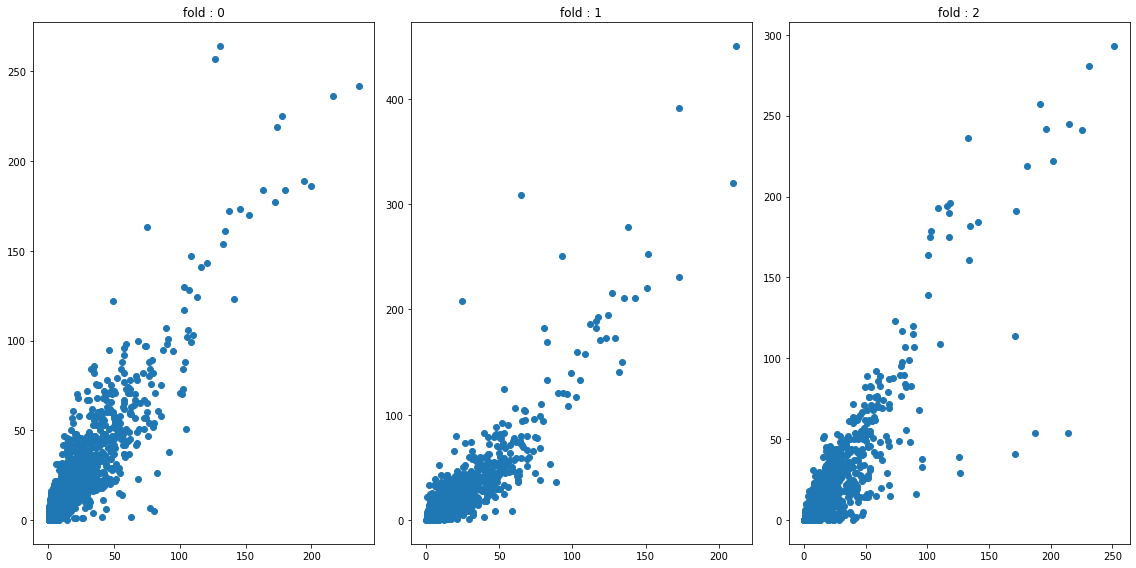

In [10]:
def scatter_plot(pred,y):
  m = len(pred)
  plt.figure(figsize = (16,8))
  for i in range(1, m+1):
    
    plt.subplot(1, 3, i)
    plt.tight_layout()
    #iterate each feature
    
    #find the parson correlation coefficient
    
    plt.title('fold : '+str(i-1))
    plt.scatter(pred[i-1] , y[i-1] )
scatter_plot(pred,label)

##### iii

I have tried to use a single model(a deep CNN with 6 individual MLPs to output the results correspongding to 6 types of tissue), but it seems that big model is always hard to train and tune. So I decide to use the naive method. 

For most images, there is no T1 cells. So I replace "myLoss" with "RMSELoss" when training models below. Then *nan* loss could be avoid when target values(the true cell counts) are all zero, which gives that total sum of squares = 0.

In [15]:

train_list = [np.where( ( (F == 3) | (F ==2) ))[0], np.where( ( (F == 1) | (F ==3) ))[0], np.where( ( (F == 1) | (F ==2) ))[0] ]
test_list = [np.where( ( (F == 1)  ))[0], np.where( ( (F == 2)  ))[0], np.where( ( (F == 3)) )[0] ]
kfold = k_fold()

all_pred = []
all_label = []

for i in range(6):
  test_y =(np.array(Y)[:,i])
  pred = []
  label = []
  for a, b in zip(train_list, test_list):
    temp_pred, temp_label = kfold.get_res( 12, X,test_y,a, b)
    pred.append(temp_pred)
    label.append(temp_label)
  all_pred.append(pred)
  all_label.append(label)

-----0 fold is processing------
EPOCH: 0


100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


train loss :  7.955140535455001


100%|██████████| 11/11 [00:00<00:00, 22.33it/s]


validation loss :  1.8060012080452659
EPOCH: 1


100%|██████████| 95/95 [00:26<00:00,  3.64it/s]


train loss :  2.219988726001037


100%|██████████| 11/11 [00:00<00:00, 22.04it/s]


validation loss :  1.6766487468372693
EPOCH: 2


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  2.223137360497525


100%|██████████| 11/11 [00:00<00:00, 21.44it/s]


EPOCH: 3


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  2.2077218338062887


100%|██████████| 11/11 [00:00<00:00, 22.20it/s]


EPOCH: 4


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  2.199261442611092


100%|██████████| 11/11 [00:00<00:00, 22.50it/s]


EPOCH: 5


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  2.1474988118598337


100%|██████████| 11/11 [00:00<00:00, 22.47it/s]


EPOCH: 6


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  2.189132548947083


100%|██████████| 11/11 [00:00<00:00, 22.50it/s]


EPOCH: 7


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  2.123511454933568


100%|██████████| 11/11 [00:00<00:00, 22.17it/s]


EPOCH: 8


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  2.1543723589495607


100%|██████████| 11/11 [00:00<00:00, 22.57it/s]


EPOCH: 9


100%|██████████| 95/95 [00:26<00:00,  3.64it/s]


train loss :  2.0666300626177536


100%|██████████| 11/11 [00:00<00:00, 22.16it/s]


EPOCH: 10


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  2.128172061317845


100%|██████████| 11/11 [00:00<00:00, 21.48it/s]


EPOCH: 11


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  2.1097841291051163


100%|██████████| 11/11 [00:00<00:00, 22.54it/s]


-----0 fold is processing------
EPOCH: 0


100%|██████████| 91/91 [00:25<00:00,  3.61it/s]


train loss :  8.424797892570496


100%|██████████| 11/11 [00:00<00:00, 23.26it/s]


validation loss :  2.1533182886513798
EPOCH: 1


100%|██████████| 91/91 [00:25<00:00,  3.63it/s]


train loss :  2.396417777616899


100%|██████████| 11/11 [00:00<00:00, 22.76it/s]


validation loss :  2.105309334668246
EPOCH: 2


100%|██████████| 91/91 [00:24<00:00,  3.65it/s]


train loss :  2.277376272684925


100%|██████████| 11/11 [00:00<00:00, 23.11it/s]


validation loss :  2.0197835618799385
EPOCH: 3


100%|██████████| 91/91 [00:24<00:00,  3.64it/s]


train loss :  2.271619635951388


100%|██████████| 11/11 [00:00<00:00, 22.57it/s]


validation loss :  1.9549640037796714
EPOCH: 4


100%|██████████| 91/91 [00:24<00:00,  3.64it/s]


train loss :  2.2789648476537767


100%|██████████| 11/11 [00:00<00:00, 23.65it/s]


validation loss :  1.9256954897533765
EPOCH: 5


100%|██████████| 91/91 [00:24<00:00,  3.65it/s]


train loss :  2.324040188894167


100%|██████████| 11/11 [00:00<00:00, 23.41it/s]


EPOCH: 6


100%|██████████| 91/91 [00:25<00:00,  3.63it/s]


train loss :  2.3066066614874114


100%|██████████| 11/11 [00:00<00:00, 23.26it/s]


EPOCH: 7


100%|██████████| 91/91 [00:24<00:00,  3.65it/s]


train loss :  2.216146470098705


100%|██████████| 11/11 [00:00<00:00, 22.99it/s]


EPOCH: 8


100%|██████████| 91/91 [00:24<00:00,  3.64it/s]


train loss :  2.2029792676260183


100%|██████████| 11/11 [00:00<00:00, 23.27it/s]


EPOCH: 9


100%|██████████| 91/91 [00:24<00:00,  3.64it/s]


train loss :  2.270997229840729


100%|██████████| 11/11 [00:00<00:00, 23.32it/s]


EPOCH: 10


100%|██████████| 91/91 [00:25<00:00,  3.63it/s]


train loss :  2.3217429571099335


100%|██████████| 11/11 [00:00<00:00, 23.16it/s]


validation loss :  1.8317468491467563
EPOCH: 11


100%|██████████| 91/91 [00:25<00:00,  3.64it/s]


train loss :  2.174420014842526


100%|██████████| 11/11 [00:00<00:00, 23.18it/s]


-----0 fold is processing------
EPOCH: 0


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  8.223365419789365


100%|██████████| 11/11 [00:00<00:00, 21.36it/s]


validation loss :  3.1307341185483066
EPOCH: 1


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  2.969273333173049


100%|██████████| 11/11 [00:00<00:00, 22.49it/s]


validation loss :  2.849475462328304
EPOCH: 2


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  2.7768629776804072


100%|██████████| 11/11 [00:00<00:00, 21.98it/s]


EPOCH: 3


100%|██████████| 95/95 [00:26<00:00,  3.65it/s]


train loss :  2.8520838066151266


100%|██████████| 11/11 [00:00<00:00, 20.76it/s]


EPOCH: 4


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  2.750547793037013


100%|██████████| 11/11 [00:00<00:00, 22.55it/s]


EPOCH: 5


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  2.7518813563020608


100%|██████████| 11/11 [00:00<00:00, 21.67it/s]


EPOCH: 6


100%|██████████| 95/95 [00:26<00:00,  3.64it/s]


train loss :  2.7568128096429927


100%|██████████| 11/11 [00:00<00:00, 22.50it/s]


validation loss :  2.8445411866361443
EPOCH: 7


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  2.752312464776792


100%|██████████| 11/11 [00:00<00:00, 22.60it/s]


validation loss :  2.7557065053419634
EPOCH: 8


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  2.7527753630751057


100%|██████████| 11/11 [00:00<00:00, 22.08it/s]


validation loss :  2.740955791690133
EPOCH: 9


100%|██████████| 95/95 [00:26<00:00,  3.64it/s]


train loss :  2.7417168610974363


100%|██████████| 11/11 [00:00<00:00, 22.18it/s]


EPOCH: 10


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  2.7055561881316335


100%|██████████| 11/11 [00:00<00:00, 21.44it/s]


EPOCH: 11


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  2.65991979272742


100%|██████████| 11/11 [00:00<00:00, 22.38it/s]


-----0 fold is processing------
EPOCH: 0


100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


train loss :  35.84244077582108


100%|██████████| 11/11 [00:00<00:00, 22.33it/s]


validation loss :  29.75362101468173
EPOCH: 1


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  29.790067030254164


100%|██████████| 11/11 [00:00<00:00, 22.51it/s]


validation loss :  27.69028091430664
EPOCH: 2


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  27.798552382619757


100%|██████████| 11/11 [00:00<00:00, 22.57it/s]


validation loss :  25.551673368974164
EPOCH: 3


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  27.385763991506476


100%|██████████| 11/11 [00:00<00:00, 21.67it/s]


validation loss :  24.73633402044123
EPOCH: 4


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  26.84879553945441


100%|██████████| 11/11 [00:00<00:00, 22.65it/s]


validation loss :  24.645876450972125
EPOCH: 5


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  26.704231723986172


100%|██████████| 11/11 [00:00<00:00, 22.09it/s]


validation loss :  24.59828862276944
EPOCH: 6


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  26.239258515207393


100%|██████████| 11/11 [00:00<00:00, 22.11it/s]


validation loss :  23.986527269536797
EPOCH: 7


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  25.64395472877904


100%|██████████| 11/11 [00:00<00:00, 22.16it/s]


validation loss :  23.7334190715443
EPOCH: 8


100%|██████████| 95/95 [00:26<00:00,  3.64it/s]


train loss :  25.880625935604698


100%|██████████| 11/11 [00:00<00:00, 22.67it/s]


EPOCH: 9


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  25.674764713488127


100%|██████████| 11/11 [00:00<00:00, 21.62it/s]


EPOCH: 10


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  25.693114913137336


100%|██████████| 11/11 [00:00<00:00, 22.13it/s]


EPOCH: 11


100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


train loss :  25.781875660544948


100%|██████████| 11/11 [00:00<00:00, 22.36it/s]


-----0 fold is processing------
EPOCH: 0


100%|██████████| 91/91 [00:25<00:00,  3.60it/s]


train loss :  36.16139539781508


100%|██████████| 11/11 [00:00<00:00, 23.16it/s]


validation loss :  29.937494451349433
EPOCH: 1


100%|██████████| 91/91 [00:25<00:00,  3.62it/s]


train loss :  29.98016246334537


100%|██████████| 11/11 [00:00<00:00, 22.59it/s]


validation loss :  27.204715035178445
EPOCH: 2


100%|██████████| 91/91 [00:25<00:00,  3.63it/s]


train loss :  29.470616267277645


100%|██████████| 11/11 [00:00<00:00, 23.18it/s]


EPOCH: 3


100%|██████████| 91/91 [00:25<00:00,  3.63it/s]


train loss :  28.487170816777827


100%|██████████| 11/11 [00:00<00:00, 22.69it/s]


validation loss :  25.81848820773038
EPOCH: 4


100%|██████████| 91/91 [00:25<00:00,  3.64it/s]


train loss :  27.81498867076832


100%|██████████| 11/11 [00:00<00:00, 22.71it/s]


validation loss :  25.172390937805176
EPOCH: 5


100%|██████████| 91/91 [00:25<00:00,  3.64it/s]


train loss :  28.457117080688477


100%|██████████| 11/11 [00:00<00:00, 22.97it/s]


validation loss :  25.040433536876332
EPOCH: 6


100%|██████████| 91/91 [00:25<00:00,  3.63it/s]


train loss :  28.073349606859814


100%|██████████| 11/11 [00:00<00:00, 23.27it/s]


validation loss :  24.117503773082387
EPOCH: 7


100%|██████████| 91/91 [00:25<00:00,  3.62it/s]


train loss :  27.688748705518115


100%|██████████| 11/11 [00:00<00:00, 22.68it/s]


EPOCH: 8


100%|██████████| 91/91 [00:24<00:00,  3.64it/s]


train loss :  27.706753950852615


100%|██████████| 11/11 [00:00<00:00, 22.70it/s]


EPOCH: 9


100%|██████████| 91/91 [00:25<00:00,  3.64it/s]


train loss :  26.866744701678936


100%|██████████| 11/11 [00:00<00:00, 23.46it/s]


EPOCH: 10


100%|██████████| 91/91 [00:25<00:00,  3.61it/s]


train loss :  26.055472070044214


100%|██████████| 11/11 [00:00<00:00, 22.28it/s]


EPOCH: 11


100%|██████████| 91/91 [00:25<00:00,  3.62it/s]


train loss :  26.58699689592634


100%|██████████| 11/11 [00:00<00:00, 22.19it/s]


-----0 fold is processing------
EPOCH: 0


100%|██████████| 95/95 [00:26<00:00,  3.59it/s]


train loss :  34.84771985505757


100%|██████████| 11/11 [00:00<00:00, 21.92it/s]


validation loss :  28.84799714521928
EPOCH: 1


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  29.114020759180974


100%|██████████| 11/11 [00:00<00:00, 22.35it/s]


validation loss :  25.813324148004707
EPOCH: 2


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  27.819999674746864


100%|██████████| 11/11 [00:00<00:00, 22.06it/s]


validation loss :  25.76458168029785
EPOCH: 3


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  27.587870467336554


100%|██████████| 11/11 [00:00<00:00, 22.38it/s]


validation loss :  23.95625825361772
EPOCH: 4


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  27.126247225309672


100%|██████████| 11/11 [00:00<00:00, 22.26it/s]


validation loss :  23.910980744795367
EPOCH: 5


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  27.333501615022357


100%|██████████| 11/11 [00:00<00:00, 22.37it/s]


validation loss :  23.012915524569426
EPOCH: 6


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  26.641522256951582


100%|██████████| 11/11 [00:00<00:00, 22.22it/s]


validation loss :  22.906551187688653
EPOCH: 7


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  26.723042959915965


100%|██████████| 11/11 [00:00<00:00, 21.49it/s]


EPOCH: 8


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  26.264316819843494


100%|██████████| 11/11 [00:00<00:00, 21.78it/s]


validation loss :  22.846040552312676
EPOCH: 9


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  25.99988459536904


100%|██████████| 11/11 [00:00<00:00, 21.93it/s]


validation loss :  22.45644794810902
EPOCH: 10


100%|██████████| 95/95 [00:26<00:00,  3.65it/s]


train loss :  25.6703269556949


100%|██████████| 11/11 [00:00<00:00, 21.70it/s]


EPOCH: 11


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  26.141219891999896


100%|██████████| 11/11 [00:00<00:00, 21.74it/s]


validation loss :  21.803851994601164
-----0 fold is processing------
EPOCH: 0


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  16.145980006770085


100%|██████████| 11/11 [00:00<00:00, 21.66it/s]


validation loss :  13.45408873124556
EPOCH: 1


100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


train loss :  16.36153709010074


100%|██████████| 11/11 [00:00<00:00, 22.27it/s]


validation loss :  8.529736388813365
EPOCH: 2


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  15.56045597477963


100%|██████████| 11/11 [00:00<00:00, 21.92it/s]


validation loss :  8.326246998526834
EPOCH: 3


100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


train loss :  14.546016156046013


100%|██████████| 11/11 [00:00<00:00, 22.09it/s]


validation loss :  8.22464825890281
EPOCH: 4


100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


train loss :  15.074062723862497


100%|██████████| 11/11 [00:00<00:00, 21.51it/s]


EPOCH: 5


100%|██████████| 95/95 [00:26<00:00,  3.60it/s]


train loss :  14.219503161781713


100%|██████████| 11/11 [00:00<00:00, 22.73it/s]


EPOCH: 6


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  15.454083086314954


100%|██████████| 11/11 [00:00<00:00, 22.23it/s]


EPOCH: 7


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  14.674601118188155


100%|██████████| 11/11 [00:00<00:00, 22.16it/s]


validation loss :  8.017273035916416
EPOCH: 8


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  14.675693938606663


100%|██████████| 11/11 [00:00<00:00, 21.73it/s]


EPOCH: 9


100%|██████████| 95/95 [00:26<00:00,  3.64it/s]


train loss :  14.159330096997714


100%|██████████| 11/11 [00:00<00:00, 22.60it/s]


EPOCH: 10


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  14.23724617707102


100%|██████████| 11/11 [00:00<00:00, 21.94it/s]


validation loss :  7.817408431660045
EPOCH: 11


100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


train loss :  14.440690281516627


100%|██████████| 11/11 [00:00<00:00, 22.25it/s]


-----0 fold is processing------
EPOCH: 0


100%|██████████| 91/91 [00:25<00:00,  3.59it/s]


train loss :  14.93923547241714


100%|██████████| 11/11 [00:00<00:00, 22.45it/s]


validation loss :  9.602934382178567
EPOCH: 1


100%|██████████| 91/91 [00:25<00:00,  3.62it/s]


train loss :  14.155671439328037


100%|██████████| 11/11 [00:00<00:00, 22.83it/s]


EPOCH: 2


100%|██████████| 91/91 [00:25<00:00,  3.62it/s]


train loss :  14.204266930674459


100%|██████████| 11/11 [00:00<00:00, 23.05it/s]


EPOCH: 3


100%|██████████| 91/91 [00:25<00:00,  3.63it/s]


train loss :  14.051842113117596


100%|██████████| 11/11 [00:00<00:00, 21.98it/s]


EPOCH: 4


100%|██████████| 91/91 [00:25<00:00,  3.61it/s]


train loss :  14.09186319728474


100%|██████████| 11/11 [00:00<00:00, 22.80it/s]


EPOCH: 5


100%|██████████| 91/91 [00:25<00:00,  3.63it/s]


train loss :  13.343164527809227


100%|██████████| 11/11 [00:00<00:00, 22.62it/s]


EPOCH: 6


100%|██████████| 91/91 [00:25<00:00,  3.63it/s]


train loss :  13.985442014840933


100%|██████████| 11/11 [00:00<00:00, 22.29it/s]


EPOCH: 7


100%|██████████| 91/91 [00:25<00:00,  3.60it/s]


train loss :  14.757494276696509


100%|██████████| 11/11 [00:00<00:00, 22.71it/s]


EPOCH: 8


100%|██████████| 91/91 [00:25<00:00,  3.63it/s]


train loss :  13.946422215346452


100%|██████████| 11/11 [00:00<00:00, 22.87it/s]


EPOCH: 9


100%|██████████| 91/91 [00:25<00:00,  3.64it/s]


train loss :  14.604963119213398


100%|██████████| 11/11 [00:00<00:00, 22.14it/s]


validation loss :  9.360434142026035
EPOCH: 10


100%|██████████| 91/91 [00:25<00:00,  3.64it/s]


train loss :  13.386308759123414


100%|██████████| 11/11 [00:00<00:00, 23.17it/s]


EPOCH: 11


100%|██████████| 91/91 [00:25<00:00,  3.62it/s]


train loss :  13.678617933294275


100%|██████████| 11/11 [00:00<00:00, 22.91it/s]


-----0 fold is processing------
EPOCH: 0


100%|██████████| 95/95 [00:26<00:00,  3.60it/s]


train loss :  14.224961677350496


100%|██████████| 11/11 [00:00<00:00, 22.52it/s]


validation loss :  7.78052958575162
EPOCH: 1


100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


train loss :  14.523376459824412


100%|██████████| 11/11 [00:00<00:00, 21.90it/s]


EPOCH: 2


100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


train loss :  14.699838678460372


100%|██████████| 11/11 [00:00<00:00, 21.90it/s]


validation loss :  7.1905976208773525
EPOCH: 3


100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


train loss :  14.388151454925538


100%|██████████| 11/11 [00:00<00:00, 21.93it/s]


EPOCH: 4


100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


train loss :  14.348049520191394


100%|██████████| 11/11 [00:00<00:00, 22.62it/s]


EPOCH: 5


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  14.133449122780247


100%|██████████| 11/11 [00:00<00:00, 21.25it/s]


EPOCH: 6


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  13.970096492767334


100%|██████████| 11/11 [00:00<00:00, 22.22it/s]


EPOCH: 7


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  14.08270566337987


100%|██████████| 11/11 [00:00<00:00, 21.42it/s]


EPOCH: 8


100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


train loss :  13.397486551184404


100%|██████████| 11/11 [00:00<00:00, 21.78it/s]


EPOCH: 9


100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


train loss :  13.414959455791273


100%|██████████| 11/11 [00:00<00:00, 21.57it/s]


EPOCH: 10


100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


train loss :  14.023788783424779


100%|██████████| 11/11 [00:00<00:00, 22.10it/s]


validation loss :  7.13486233624545
EPOCH: 11


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  14.208562825855456


100%|██████████| 11/11 [00:00<00:00, 21.99it/s]


-----0 fold is processing------
EPOCH: 0


100%|██████████| 95/95 [00:26<00:00,  3.58it/s]


train loss :  9.992588876423083


100%|██████████| 11/11 [00:00<00:00, 22.50it/s]


validation loss :  6.345662637190386
EPOCH: 1


100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


train loss :  7.094028688731947


100%|██████████| 11/11 [00:00<00:00, 22.29it/s]


validation loss :  6.293370181863958
EPOCH: 2


100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


train loss :  6.90522601980912


100%|██████████| 11/11 [00:00<00:00, 21.99it/s]


validation loss :  5.799585472453725
EPOCH: 3


100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


train loss :  6.707371367906269


100%|██████████| 11/11 [00:00<00:00, 22.68it/s]


EPOCH: 4


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  6.530445239418431


100%|██████████| 11/11 [00:00<00:00, 22.04it/s]


EPOCH: 5


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  6.608712527626439


100%|██████████| 11/11 [00:00<00:00, 22.19it/s]


EPOCH: 6


100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


train loss :  6.414091908304315


100%|██████████| 11/11 [00:00<00:00, 22.44it/s]


EPOCH: 7


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  6.330189413773386


100%|██████████| 11/11 [00:00<00:00, 22.20it/s]


validation loss :  5.560635696757924
EPOCH: 8


100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


train loss :  6.338062833484851


100%|██████████| 11/11 [00:00<00:00, 22.03it/s]


validation loss :  5.540593060580167
EPOCH: 9


100%|██████████| 95/95 [00:26<00:00,  3.59it/s]


train loss :  6.121829223632813


100%|██████████| 11/11 [00:00<00:00, 22.30it/s]


EPOCH: 10


100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


train loss :  6.130384706196032


100%|██████████| 11/11 [00:00<00:00, 22.16it/s]


EPOCH: 11


100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


train loss :  6.103010611785086


100%|██████████| 11/11 [00:00<00:00, 21.70it/s]


-----0 fold is processing------
EPOCH: 0


100%|██████████| 91/91 [00:25<00:00,  3.60it/s]


train loss :  9.84038287466699


100%|██████████| 11/11 [00:00<00:00, 22.15it/s]


validation loss :  7.8120623068376025
EPOCH: 1


100%|██████████| 91/91 [00:25<00:00,  3.63it/s]


train loss :  7.520436365525801


100%|██████████| 11/11 [00:00<00:00, 23.05it/s]


validation loss :  6.605708035555753
EPOCH: 2


100%|██████████| 91/91 [00:25<00:00,  3.62it/s]


train loss :  7.125657524381365


100%|██████████| 11/11 [00:00<00:00, 23.03it/s]


validation loss :  5.964866708625447
EPOCH: 3


100%|██████████| 91/91 [00:25<00:00,  3.64it/s]


train loss :  7.0455596682789565


100%|██████████| 11/11 [00:00<00:00, 23.33it/s]


EPOCH: 4


100%|██████████| 91/91 [00:25<00:00,  3.62it/s]


train loss :  6.9070786853413


100%|██████████| 11/11 [00:00<00:00, 23.31it/s]


EPOCH: 5


100%|██████████| 91/91 [00:25<00:00,  3.62it/s]


train loss :  6.690085921968732


100%|██████████| 11/11 [00:00<00:00, 22.74it/s]


EPOCH: 6


100%|██████████| 91/91 [00:24<00:00,  3.64it/s]


train loss :  6.783289922462715


100%|██████████| 11/11 [00:00<00:00, 23.41it/s]


validation loss :  5.882092562588778
EPOCH: 7


100%|██████████| 91/91 [00:25<00:00,  3.62it/s]


train loss :  6.721451764578347


100%|██████████| 11/11 [00:00<00:00, 22.72it/s]


validation loss :  5.629393685947765
EPOCH: 8


100%|██████████| 91/91 [00:25<00:00,  3.62it/s]


train loss :  6.555165890808944


100%|██████████| 11/11 [00:00<00:00, 21.45it/s]


validation loss :  5.607928666201505
EPOCH: 9


100%|██████████| 91/91 [00:25<00:00,  3.61it/s]


train loss :  6.588549477713449


100%|██████████| 11/11 [00:00<00:00, 23.13it/s]


validation loss :  5.256763526661829
EPOCH: 10


100%|██████████| 91/91 [00:25<00:00,  3.62it/s]


train loss :  6.427587189517179


100%|██████████| 11/11 [00:00<00:00, 22.91it/s]


EPOCH: 11


100%|██████████| 91/91 [00:25<00:00,  3.60it/s]


train loss :  6.425414727284358


100%|██████████| 11/11 [00:00<00:00, 22.21it/s]


-----0 fold is processing------
EPOCH: 0


100%|██████████| 95/95 [00:26<00:00,  3.59it/s]


train loss :  9.97188451666581


100%|██████████| 11/11 [00:00<00:00, 21.58it/s]


validation loss :  8.341963291168213
EPOCH: 1


100%|██████████| 95/95 [00:26<00:00,  3.60it/s]


train loss :  7.155512812263087


100%|██████████| 11/11 [00:00<00:00, 21.52it/s]


validation loss :  7.470670743422075
EPOCH: 2


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  6.916614379380879


100%|██████████| 11/11 [00:00<00:00, 21.89it/s]


validation loss :  6.888257026672363
EPOCH: 3


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  6.640124960949547


100%|██████████| 11/11 [00:00<00:00, 22.08it/s]


EPOCH: 4


100%|██████████| 95/95 [00:26<00:00,  3.64it/s]


train loss :  6.446987455769589


100%|██████████| 11/11 [00:00<00:00, 22.01it/s]


validation loss :  6.840307127345692
EPOCH: 5


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  6.401468176590769


100%|██████████| 11/11 [00:00<00:00, 22.48it/s]


validation loss :  6.416416558352384
EPOCH: 6


100%|██████████| 95/95 [00:26<00:00,  3.64it/s]


train loss :  6.31066185047752


100%|██████████| 11/11 [00:00<00:00, 21.66it/s]


EPOCH: 7


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  6.1192573948910365


100%|██████████| 11/11 [00:00<00:00, 22.18it/s]


validation loss :  5.971625176343051
EPOCH: 8


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  6.135170512450369


100%|██████████| 11/11 [00:00<00:00, 22.40it/s]


EPOCH: 9


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  6.099743434002525


100%|██████████| 11/11 [00:00<00:00, 22.05it/s]


EPOCH: 10


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  6.003127293837698


100%|██████████| 11/11 [00:00<00:00, 21.20it/s]


validation loss :  5.831864660436457
EPOCH: 11


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  5.991800805142051


100%|██████████| 11/11 [00:00<00:00, 21.58it/s]


-----0 fold is processing------
EPOCH: 0


100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


train loss :  7.742792674742247


100%|██████████| 11/11 [00:00<00:00, 21.85it/s]


validation loss :  1.9048682126131924
EPOCH: 1


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  1.586572653996317


100%|██████████| 11/11 [00:00<00:00, 21.36it/s]


validation loss :  1.7279557152227922
EPOCH: 2


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  1.5566659441119746


100%|██████████| 11/11 [00:00<00:00, 22.37it/s]


EPOCH: 3


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  1.5391396390764336


100%|██████████| 11/11 [00:00<00:00, 22.29it/s]


validation loss :  1.7049953937530518
EPOCH: 4


100%|██████████| 95/95 [00:26<00:00,  3.60it/s]


train loss :  1.5463058678727402


100%|██████████| 11/11 [00:00<00:00, 22.24it/s]


EPOCH: 5


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  1.4913828965864684


100%|██████████| 11/11 [00:00<00:00, 22.22it/s]


EPOCH: 6


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  1.4768418026597876


100%|██████████| 11/11 [00:00<00:00, 22.63it/s]


EPOCH: 7


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  1.496303376712297


100%|██████████| 11/11 [00:00<00:00, 22.02it/s]


EPOCH: 8


100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


train loss :  1.4746095218156514


100%|██████████| 11/11 [00:00<00:00, 22.07it/s]


validation loss :  1.7001659003171055
EPOCH: 9


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  1.4972127550526668


100%|██████████| 11/11 [00:00<00:00, 21.61it/s]


validation loss :  1.6597650322047146
EPOCH: 10


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  1.4949926079888092


100%|██████████| 11/11 [00:00<00:00, 22.10it/s]


EPOCH: 11


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  1.461958798609282


100%|██████████| 11/11 [00:00<00:00, 21.95it/s]


validation loss :  1.6013438701629639
-----0 fold is processing------
EPOCH: 0


100%|██████████| 91/91 [00:25<00:00,  3.60it/s]


train loss :  7.580740390243111


100%|██████████| 11/11 [00:00<00:00, 22.88it/s]


validation loss :  1.3140262202783064
EPOCH: 1


100%|██████████| 91/91 [00:25<00:00,  3.62it/s]


train loss :  1.5941586948030597


100%|██████████| 11/11 [00:00<00:00, 22.82it/s]


validation loss :  1.0907312794165178
EPOCH: 2


100%|██████████| 91/91 [00:25<00:00,  3.63it/s]


train loss :  1.5148925928624122


100%|██████████| 11/11 [00:00<00:00, 22.01it/s]


EPOCH: 3


100%|██████████| 91/91 [00:25<00:00,  3.63it/s]


train loss :  1.4605210027196904


100%|██████████| 11/11 [00:00<00:00, 22.28it/s]


EPOCH: 4


100%|██████████| 91/91 [00:25<00:00,  3.63it/s]


train loss :  1.4820511596543449


100%|██████████| 11/11 [00:00<00:00, 23.40it/s]


EPOCH: 5


100%|██████████| 91/91 [00:25<00:00,  3.63it/s]


train loss :  1.4842126064903134


100%|██████████| 11/11 [00:00<00:00, 23.33it/s]


EPOCH: 6


100%|██████████| 91/91 [00:25<00:00,  3.62it/s]


train loss :  1.4334269539340512


100%|██████████| 11/11 [00:00<00:00, 23.19it/s]


validation loss :  1.0867294736883857
EPOCH: 7


100%|██████████| 91/91 [00:25<00:00,  3.63it/s]


train loss :  1.4321657363530045


100%|██████████| 11/11 [00:00<00:00, 22.84it/s]


validation loss :  0.9958987019278787
EPOCH: 8


100%|██████████| 91/91 [00:25<00:00,  3.63it/s]


train loss :  1.3951106012522518


100%|██████████| 11/11 [00:00<00:00, 22.99it/s]


EPOCH: 9


100%|██████████| 91/91 [00:25<00:00,  3.63it/s]


train loss :  1.3790740043252379


100%|██████████| 11/11 [00:00<00:00, 23.20it/s]


validation loss :  0.9339546981182966
EPOCH: 10


100%|██████████| 91/91 [00:25<00:00,  3.62it/s]


train loss :  1.3850767563332569


100%|██████████| 11/11 [00:00<00:00, 23.17it/s]


EPOCH: 11


100%|██████████| 91/91 [00:25<00:00,  3.63it/s]


train loss :  1.3284354448973477


100%|██████████| 11/11 [00:00<00:00, 23.33it/s]


-----0 fold is processing------
EPOCH: 0


100%|██████████| 95/95 [00:26<00:00,  3.60it/s]


train loss :  7.09332958020662


100%|██████████| 11/11 [00:00<00:00, 22.22it/s]


validation loss :  1.4853336919437756
EPOCH: 1


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  1.5032915874531394


100%|██████████| 11/11 [00:00<00:00, 21.72it/s]


validation loss :  1.4435248537497087
EPOCH: 2


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  1.4874287765277059


100%|██████████| 11/11 [00:00<00:00, 21.38it/s]


EPOCH: 3


100%|██████████| 95/95 [00:26<00:00,  3.64it/s]


train loss :  1.4694742334516424


100%|██████████| 11/11 [00:00<00:00, 21.97it/s]


validation loss :  1.412129440090873
EPOCH: 4


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  1.4433526393614318


100%|██████████| 11/11 [00:00<00:00, 22.47it/s]


validation loss :  1.3967792771079324
EPOCH: 5


100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


train loss :  1.422496151296716


100%|██████████| 11/11 [00:00<00:00, 22.36it/s]


validation loss :  1.3256064788861708
EPOCH: 6


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  1.40539775208423


100%|██████████| 11/11 [00:00<00:00, 22.25it/s]


validation loss :  1.3251505548303777
EPOCH: 7


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  1.3708815778556622


100%|██████████| 11/11 [00:00<00:00, 22.25it/s]


EPOCH: 8


100%|██████████| 95/95 [00:26<00:00,  3.64it/s]


train loss :  1.3677042487420534


100%|██████████| 11/11 [00:00<00:00, 22.30it/s]


validation loss :  1.269569386135448
EPOCH: 9


100%|██████████| 95/95 [00:26<00:00,  3.64it/s]


train loss :  1.3190200015118247


100%|██████████| 11/11 [00:00<00:00, 21.97it/s]


EPOCH: 10


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  1.320051668192211


100%|██████████| 11/11 [00:00<00:00, 22.49it/s]


validation loss :  1.1858065074140376
EPOCH: 11


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  1.2712292592776449


100%|██████████| 11/11 [00:00<00:00, 21.45it/s]


-----0 fold is processing------
EPOCH: 0


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  17.233688505072344


100%|██████████| 11/11 [00:00<00:00, 22.39it/s]


validation loss :  16.215130892666902
EPOCH: 1


100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


train loss :  16.017408631977283


100%|██████████| 11/11 [00:00<00:00, 22.04it/s]


validation loss :  14.294475555419922
EPOCH: 2


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  15.5607176429347


100%|██████████| 11/11 [00:00<00:00, 21.95it/s]


validation loss :  13.530203125693582
EPOCH: 3


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  15.393942672327945


100%|██████████| 11/11 [00:00<00:00, 22.54it/s]


EPOCH: 4


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  15.102788282695569


100%|██████████| 11/11 [00:00<00:00, 22.71it/s]


validation loss :  13.102789532054555
EPOCH: 5


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  15.029143484015213


100%|██████████| 11/11 [00:00<00:00, 21.75it/s]


EPOCH: 6


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  14.935352777179919


100%|██████████| 11/11 [00:00<00:00, 22.03it/s]


EPOCH: 7


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  14.785733729914615


100%|██████████| 11/11 [00:00<00:00, 21.36it/s]


validation loss :  12.947084947065873
EPOCH: 8


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  14.548126401399312


100%|██████████| 11/11 [00:00<00:00, 22.11it/s]


EPOCH: 9


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  14.467812096445185


100%|██████████| 11/11 [00:00<00:00, 22.67it/s]


validation loss :  12.889298699118875
EPOCH: 10


100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


train loss :  14.329901534632633


100%|██████████| 11/11 [00:00<00:00, 22.02it/s]


validation loss :  12.62163222919811
EPOCH: 11


100%|██████████| 95/95 [00:26<00:00,  3.64it/s]


train loss :  14.257352507741828


100%|██████████| 11/11 [00:00<00:00, 21.54it/s]


-----0 fold is processing------
EPOCH: 0


100%|██████████| 91/91 [00:25<00:00,  3.61it/s]


train loss :  17.288375058016936


100%|██████████| 11/11 [00:00<00:00, 22.68it/s]


validation loss :  16.317959091880105
EPOCH: 1


100%|██████████| 91/91 [00:25<00:00,  3.61it/s]


train loss :  16.036722141307788


100%|██████████| 11/11 [00:00<00:00, 23.22it/s]


validation loss :  15.562691688537598
EPOCH: 2


100%|██████████| 91/91 [00:25<00:00,  3.63it/s]


train loss :  15.860261414077256


100%|██████████| 11/11 [00:00<00:00, 23.30it/s]


validation loss :  14.50427211414684
EPOCH: 3


100%|██████████| 91/91 [00:25<00:00,  3.62it/s]


train loss :  15.374859767955739


100%|██████████| 11/11 [00:00<00:00, 23.40it/s]


EPOCH: 4


100%|██████████| 91/91 [00:25<00:00,  3.61it/s]


train loss :  15.327935271210723


100%|██████████| 11/11 [00:00<00:00, 23.13it/s]


EPOCH: 5


100%|██████████| 91/91 [00:25<00:00,  3.63it/s]


train loss :  15.186995139488808


100%|██████████| 11/11 [00:00<00:00, 22.94it/s]


EPOCH: 6


100%|██████████| 91/91 [00:24<00:00,  3.64it/s]


train loss :  15.19469238113571


100%|██████████| 11/11 [00:00<00:00, 22.74it/s]


validation loss :  14.164188991893422
EPOCH: 7


100%|██████████| 91/91 [00:25<00:00,  3.62it/s]


train loss :  15.036196258041885


100%|██████████| 11/11 [00:00<00:00, 22.50it/s]


validation loss :  13.68817325071855
EPOCH: 8


100%|██████████| 91/91 [00:25<00:00,  3.64it/s]


train loss :  14.693557686858124


100%|██████████| 11/11 [00:00<00:00, 22.48it/s]


EPOCH: 9


100%|██████████| 91/91 [00:25<00:00,  3.63it/s]


train loss :  14.493053750677424


100%|██████████| 11/11 [00:00<00:00, 22.86it/s]


EPOCH: 10


100%|██████████| 91/91 [00:25<00:00,  3.62it/s]


train loss :  14.444462807623895


100%|██████████| 11/11 [00:00<00:00, 21.61it/s]


validation loss :  13.002465898340398
EPOCH: 11


100%|██████████| 91/91 [00:25<00:00,  3.62it/s]


train loss :  14.324014380737976


100%|██████████| 11/11 [00:00<00:00, 23.05it/s]


-----0 fold is processing------
EPOCH: 0


100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


train loss :  15.918996941415887


100%|██████████| 11/11 [00:00<00:00, 21.99it/s]


validation loss :  14.752690575339578
EPOCH: 1


100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


train loss :  15.193372686285722


100%|██████████| 11/11 [00:00<00:00, 21.75it/s]


validation loss :  13.985081325877797
EPOCH: 2


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  15.059528220327277


100%|██████████| 11/11 [00:00<00:00, 21.57it/s]


validation loss :  13.813409631902521
EPOCH: 3


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  14.870340989765369


100%|██████████| 11/11 [00:00<00:00, 21.89it/s]


EPOCH: 4


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  14.576055667274877


100%|██████████| 11/11 [00:00<00:00, 22.10it/s]


validation loss :  13.642379067160867
EPOCH: 5


100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


train loss :  14.309311655948036


100%|██████████| 11/11 [00:00<00:00, 21.21it/s]


validation loss :  13.509234428405762
EPOCH: 6


100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


train loss :  14.274394075494063


100%|██████████| 11/11 [00:00<00:00, 22.34it/s]


validation loss :  13.38798696344549
EPOCH: 7


100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


train loss :  14.148181112189041


100%|██████████| 11/11 [00:00<00:00, 22.18it/s]


EPOCH: 8


100%|██████████| 95/95 [00:26<00:00,  3.64it/s]


train loss :  14.226576774998716


100%|██████████| 11/11 [00:00<00:00, 21.93it/s]


validation loss :  12.85259975086559
EPOCH: 9


100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


train loss :  14.175600844935367


100%|██████████| 11/11 [00:00<00:00, 21.53it/s]


EPOCH: 10


100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


train loss :  14.006736574674907


100%|██████████| 11/11 [00:00<00:00, 21.51it/s]


EPOCH: 11


100%|██████████| 95/95 [00:26<00:00,  3.64it/s]


train loss :  14.359921093990929


100%|██████████| 11/11 [00:00<00:00, 22.08it/s]


validation loss :  12.817195198752664


In [25]:
 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 
for i in range(6):
  print("------------cell {} result -------------".format(i))
  (combine_df(all_pred[i],all_label[i]))


------------cell 0 result -------------


,RMSE,Pearson Correlation Coefficient,Spearman Correlation Coefficeint,R2 score
fold0,0.965468,0.186666,0.080220,-77.093201
fold1,1.010623,0.203506,0.137139,-18.974615
fold2,0.762519,0.032279,0.161968,-8.731085


------------cell 1 result -------------


,RMSE,Pearson Correlation Coefficient,Spearman Correlation Coefficeint,R2 score
fold0,4.404525,0.759857,0.712220,0.292286
fold1,4.465073,0.620506,0.727062,-0.348963
fold2,4.496777,0.686023,0.695569,-0.064728


------------cell 2 result -------------


,RMSE,Pearson Correlation Coefficient,Spearman Correlation Coefficeint,R2 score
fold0,3.016803,0.791043,0.854750,0.107090
fold1,3.043541,0.762026,0.857304,-1.748463
fold2,2.901431,0.877156,0.806033,0.671820


------------cell 3 result -------------


,RMSE,Pearson Correlation Coefficient,Spearman Correlation Coefficeint,R2 score
fold0,2.011388,0.495502,0.716393,-2.634070
fold1,1.985126,0.472267,0.714851,-0.244963
fold2,2.075185,0.405309,0.614350,-0.912404


------------cell 4 result -------------


,RMSE,Pearson Correlation Coefficient,Spearman Correlation Coefficeint,R2 score
fold0,0.800360,0.288654,0.321319,-2.329936
fold1,0.796330,0.136857,0.308527,-8.686739
fold2,0.811457,0.301783,0.371409,-12.990356


------------cell 5 result -------------


,RMSE,Pearson Correlation Coefficient,Spearman Correlation Coefficeint,R2 score
fold0,3.186689,0.583273,0.609359,-0.874797
fold1,3.222734,0.507937,0.616440,-0.562576
fold2,3.473621,0.426191,0.418238,-2.394494


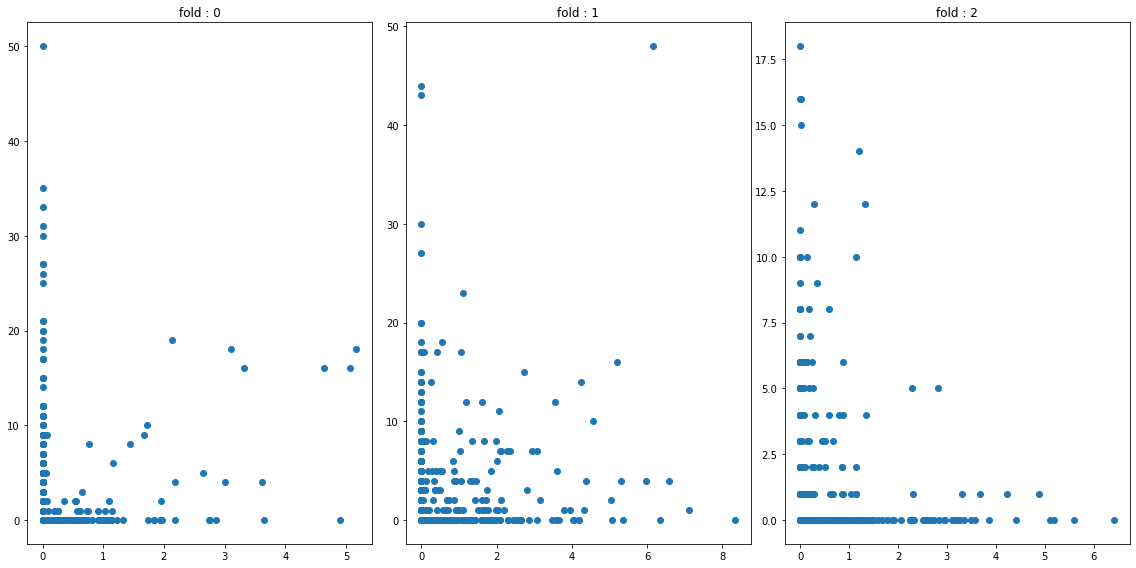

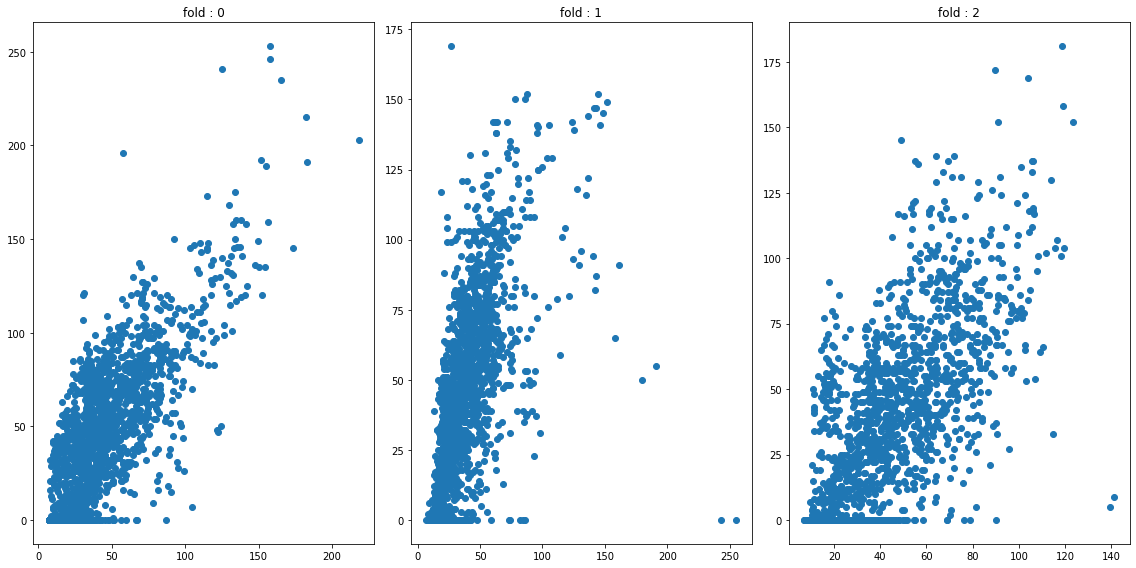

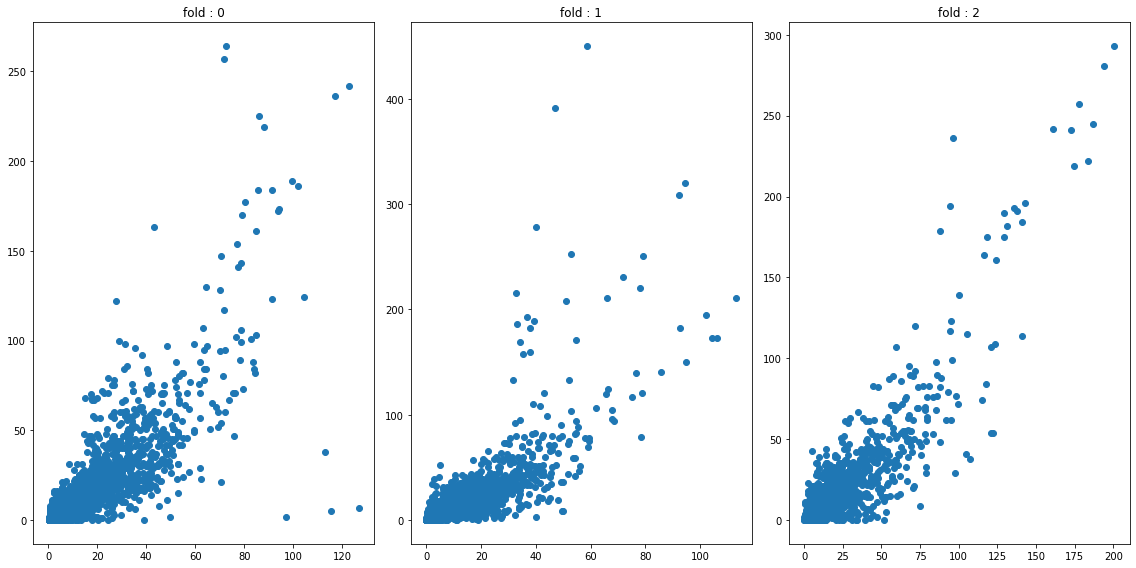

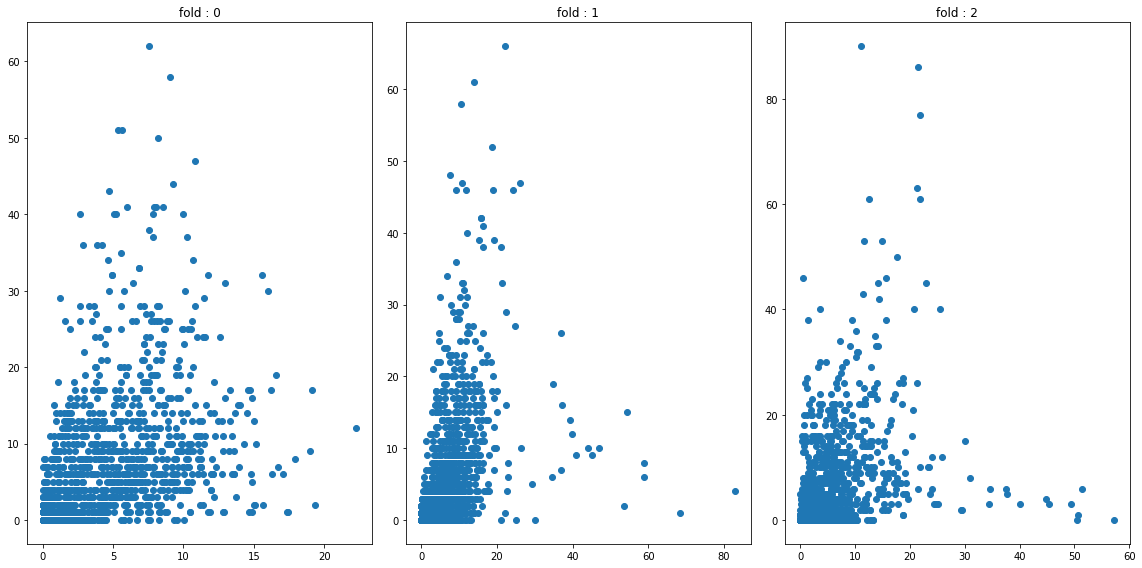

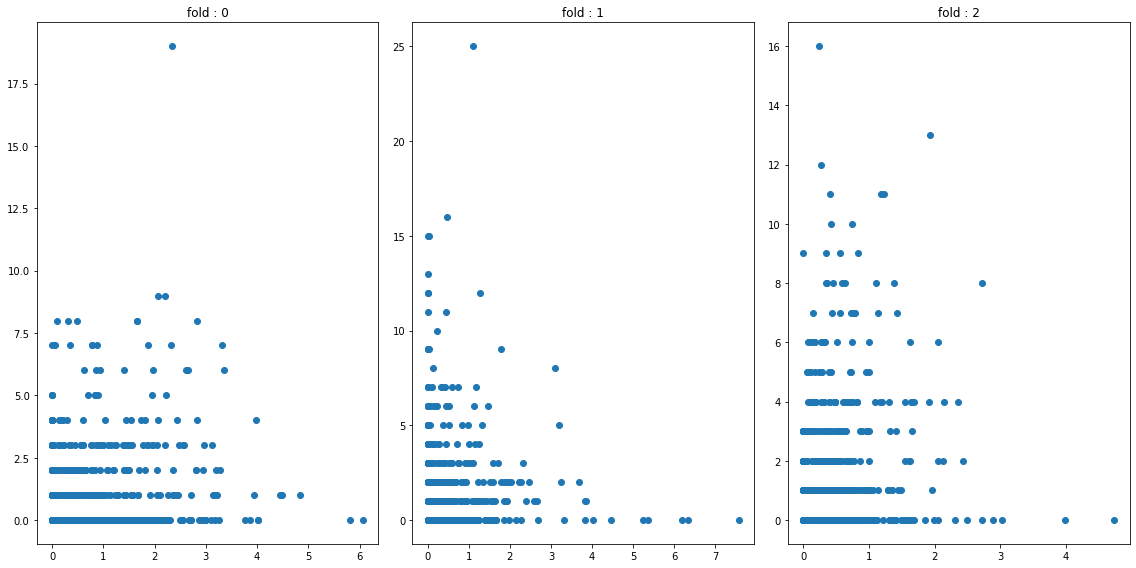

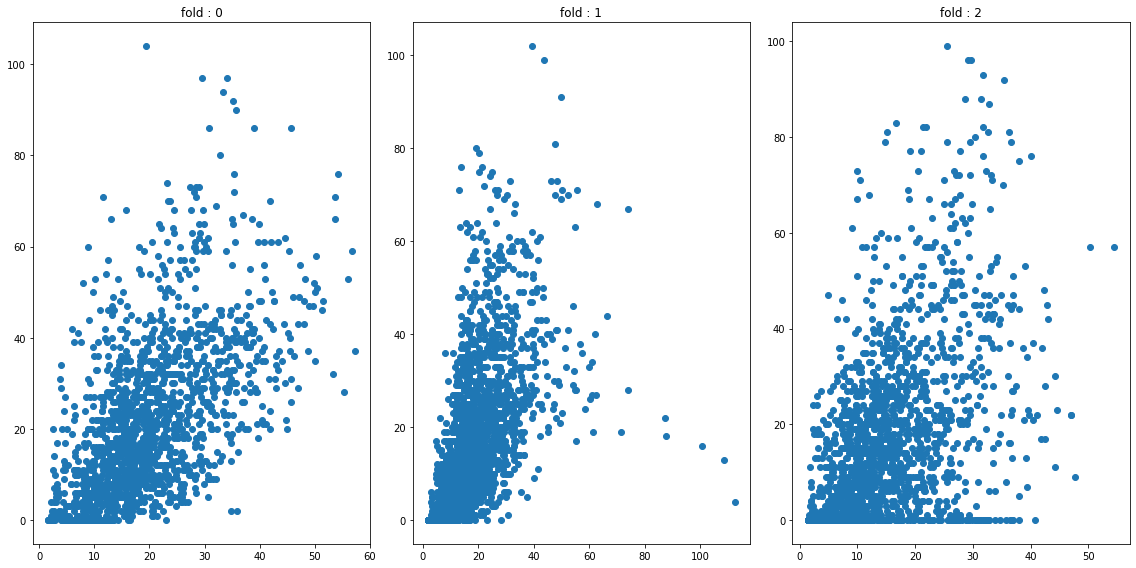

In [26]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
for i in range(6):

  scatter_plot(all_pred[i],all_label[i])
